# EVALUATION PROJECT 8:-RAINFALL WEATHER FORECASTING
# INTERNSHIP NO. :- 66
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [266]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [7]:
pd.set_option('Display.max_columns',None)

In [37]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64


MinTemp
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: count, Length: 285, dtype: int64


MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: count, Length: 331, dtype: int64


Rainfall
0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [9]:
df.shape 
# there are 8425 rows and 23 columns in the dataset

(8425, 23)

In [10]:
df.dtypes
# each columns datatype is written in front of them like for 'Location' it's datatype is object and for 'WindDir9am' it's float

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [27]:
df.isnull().sum()
# there are a lot of missing data is present

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [14]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i)
        print(df[i].mode())
        print('\n')
    else:
        print(i)
        print(df[i].mean())
        print('\n')

Date
0      2011-01-19
1      2011-01-20
2      2011-01-21
3      2011-01-22
4      2011-01-23
          ...    
123    2011-06-21
124    2011-06-22
125    2011-06-23
126    2011-06-24
127    2011-06-25
Name: Date, Length: 128, dtype: object


Location
0    Melbourne
Name: Location, dtype: object


MinTemp
13.193305389221557


MaxTemp
23.85997609085475


Rainfall
2.8059132559560167


Evaporation
5.38939548137594


Sunshine
7.632204919882645


WindGustDir
0    N
Name: WindGustDir, dtype: object


WindGustSpeed
40.174468657519505


WindDir9am
0    N
Name: WindDir9am, dtype: object


WindDir3pm
0    SE
Name: WindDir3pm, dtype: object


WindSpeed9am
13.847646424721523


WindSpeed3pm
18.533661937965856


Humidity9am
67.82249581639971


Humidity3pm
51.2497897392767


Pressure9am
1017.640233277122


Pressure3pm
1015.2360747926332


Cloud9am
4.566622251832112


Cloud3pm
4.5031825795644895


Temp9am
17.762014577607836


Temp3pm
22.442934325849443


RainToday
0    No
Name: RainToday, dtype: obje

In [267]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna(df[i].mode(),inplace=True)
        
    else:
        df[i].fillna(df[i].mean(),inplace=True)
        

In [268]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

# DROPPING NULL VALUES

In [22]:
# df.dropna(axis=0,inplace=True)
# dropping null values (checking how much data will be lost if a lot of data is lost fill null values rather than drop data)

In [23]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
df.shape

(6716, 23)

In [25]:
((8425-6716)/8425)*100
# if we drop null values 20% data is lost so it's better to fill object data with mode values 

20.28486646884273

# FILL NULL VALUES WITH MODE AND MEAN

In [269]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [270]:
df['WindGustDir'].fillna('N',inplace=True)
df['WindDir9am'].fillna('N',inplace=True)
df['WindDir3pm'].fillna('SE',inplace=True)
df['RainToday'].fillna('No',inplace=True)
df['RainTomorrow'].fillna('No',inplace=True)


In [271]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [261]:
df.info()
# this shows:
# 1) there are 8425 rows and 23 columns
# 2) there are no null values in the dataset
# 3) and datatype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [35]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
# this show :
# 1) value counts for each unique value of each column
# 2) length represents total no. of unique values for that column
# 3) for e.g :- for Location column Melbourne is a unique value and it's value count is 1622

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64


MinTemp
 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: count, Length: 286, dtype: int64


MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: count, Length: 332, dtype: int64


Rainfall
0.000000      5299
0.200000       406
2.805913       240
0.400000       1

# DESCRIPTION OF DATASET

In [43]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [272]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [273]:
df
# all object datatype is converted into int datatype

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [46]:
df.describe()
# we have to check object datatype as well but we are not going to remove skewness from object datatype as it will mess up the data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,1296.570564,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,7.217804,40.174469,7.267418,7.810445,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,0.236202,0.236320
std,854.249434,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.702616,13.776101,4.588045,4.430162,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,0.424773,0.424846
min,0.000000,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,589.000000,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,3.000000,31.000000,3.000000,4.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,0.000000,0.000000
50%,1088.000000,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,7.000000,40.174469,7.000000,8.000000,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,0.000000,0.000000
75%,2021.000000,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,11.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,3003.000000,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [ ]:
# 1) all the columns count is 8425 meaning no null value is present in the dataset
# 2) skewness is present in the dataset ,if mean > median (50%)-> right skew and if median > mean -> left skew
#    right skew: 'Date' , 'MaxTemp' , 'Rainfall' , 'WindGusDir' , 'WindDir9am' , 'WindSpeed9am' , 'Humidity3pm' , 'Temp3pm' ,
#                'Rain Today' , 'RainTomorrow'
#    left skew: 'Location' 'MinTemp' , 'WinddDir3pm' , 'WindSpeed3am' , 'Humidity9am'
# 3) outliers are present in the dataset, if there is a jump in the value of 75% and 100% outliers maybe present
#    e.g:- 'Location' , 'MinTemp' , 'MaxTemp' , 'Rainfall'(highly) , 'Evaporation'(highly) , 'Sunshine' ,
#          'WindGustSpeed'(highly) , 'WindSpeed9am'(highly) , 'WindSpeed3am'(highly) , 'Humidity9am' , 'Humidity3pm' , 
#          'Pressure9am' , 'Pressure3pm' , 'Temp9am' , 'Temp3pm' 

# CHECKING FOR SKEWNESS

In [50]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [51]:
b=[ 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']
b

['Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

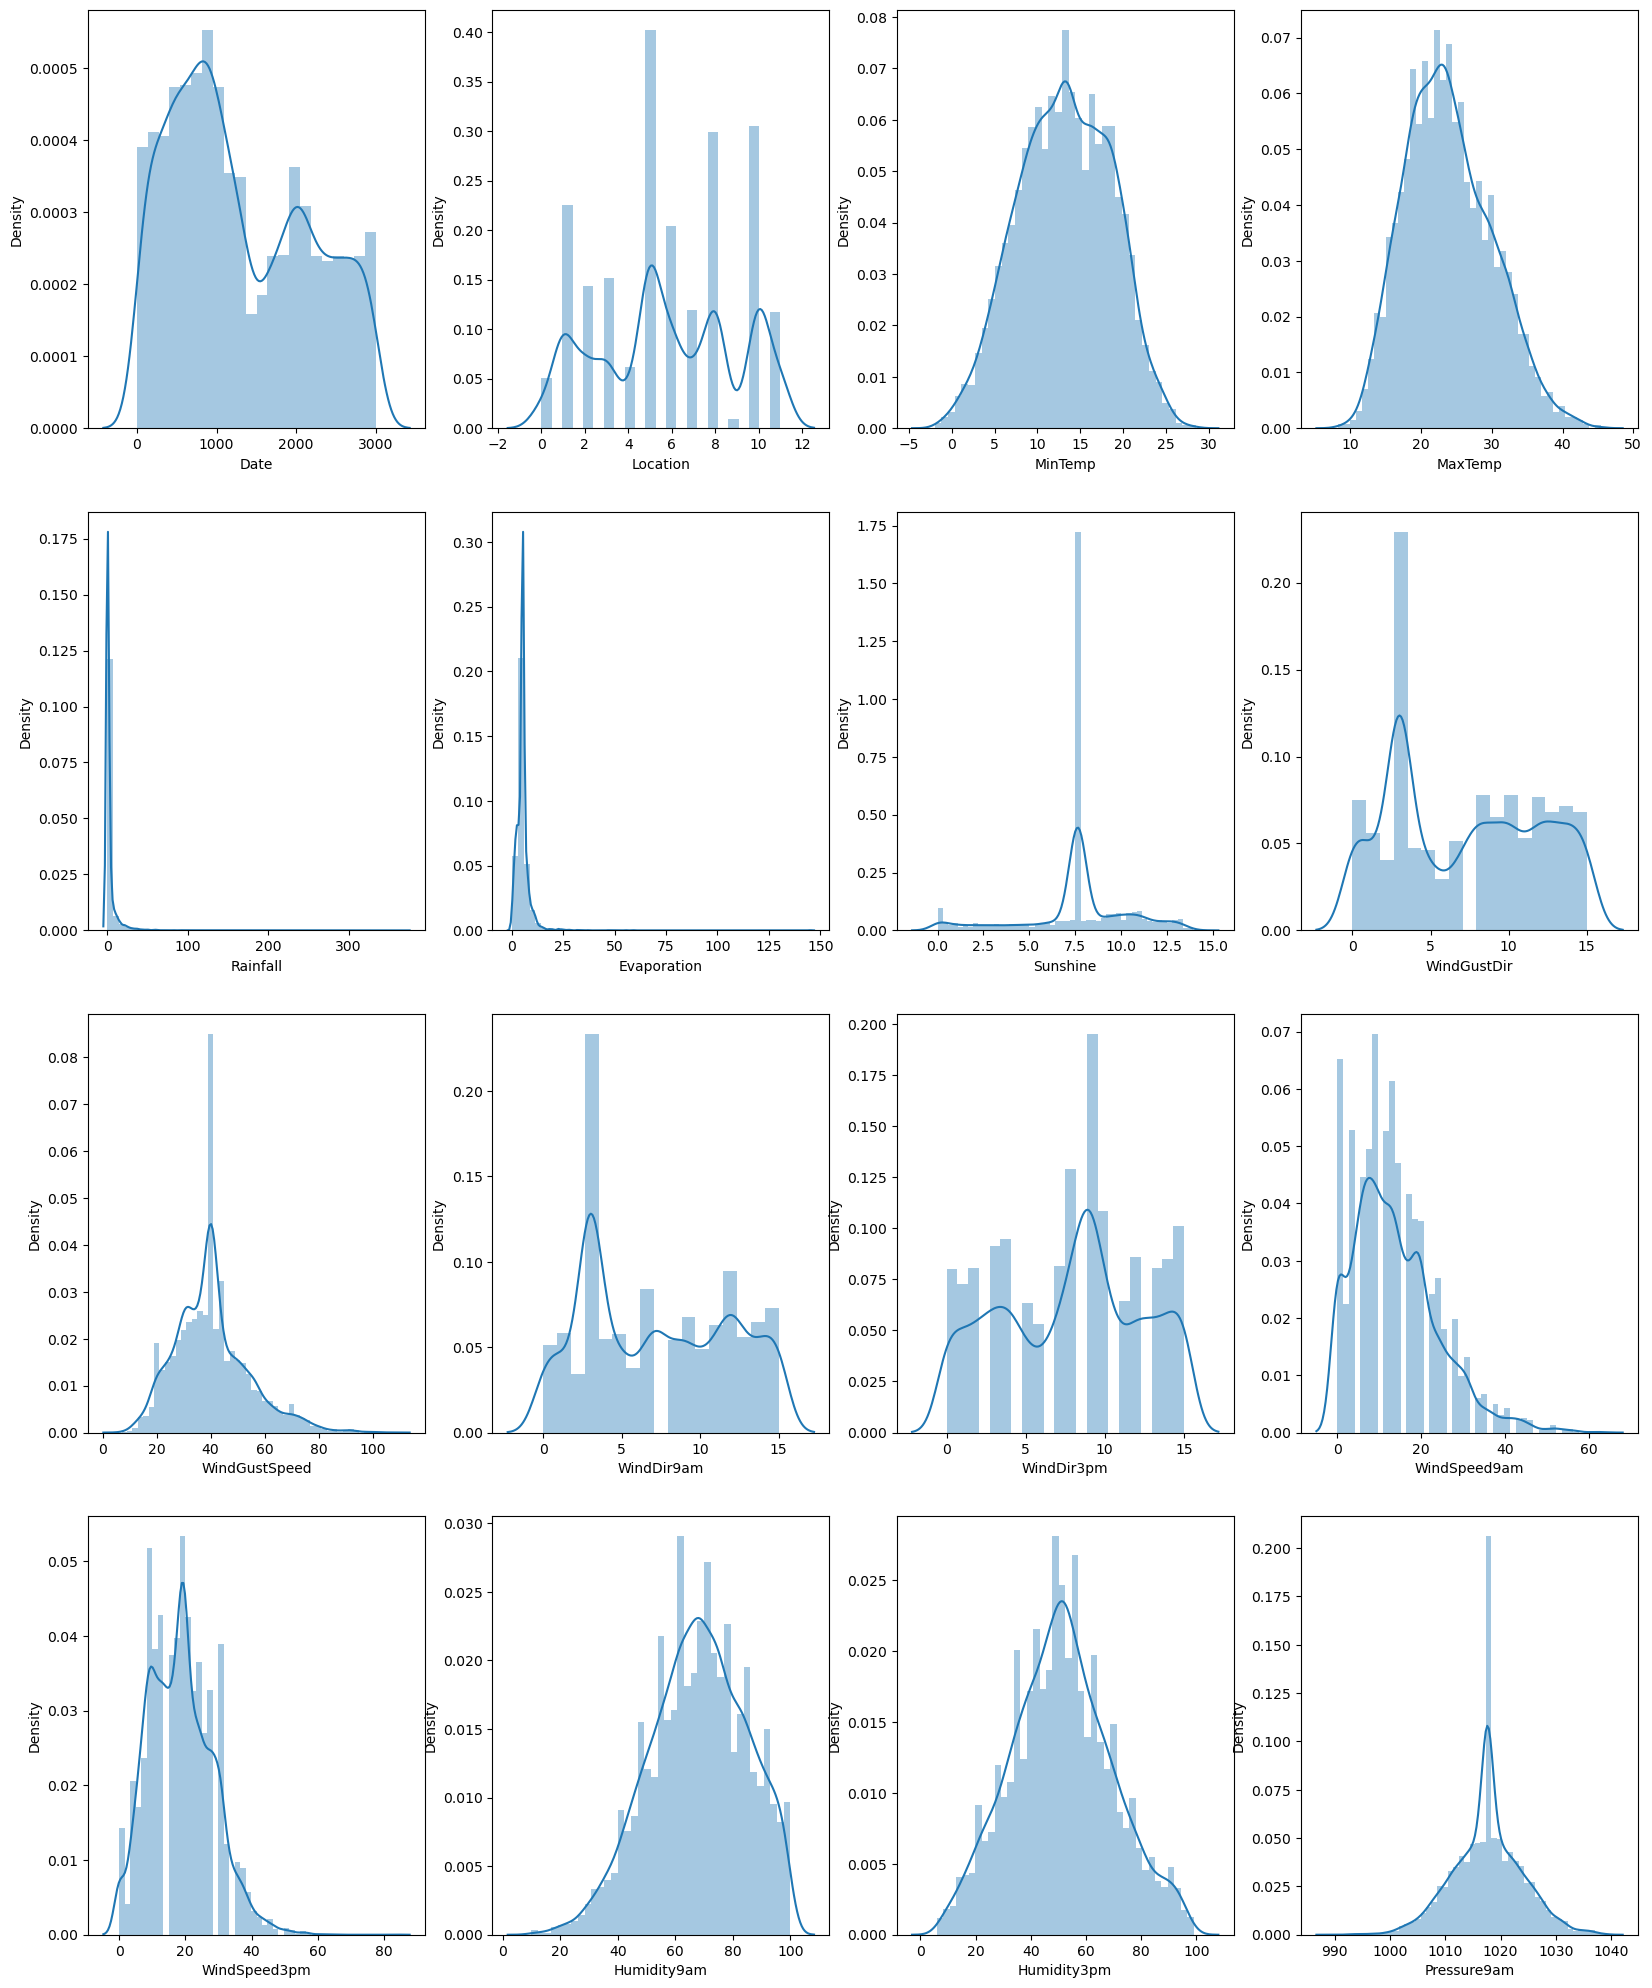

In [49]:
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

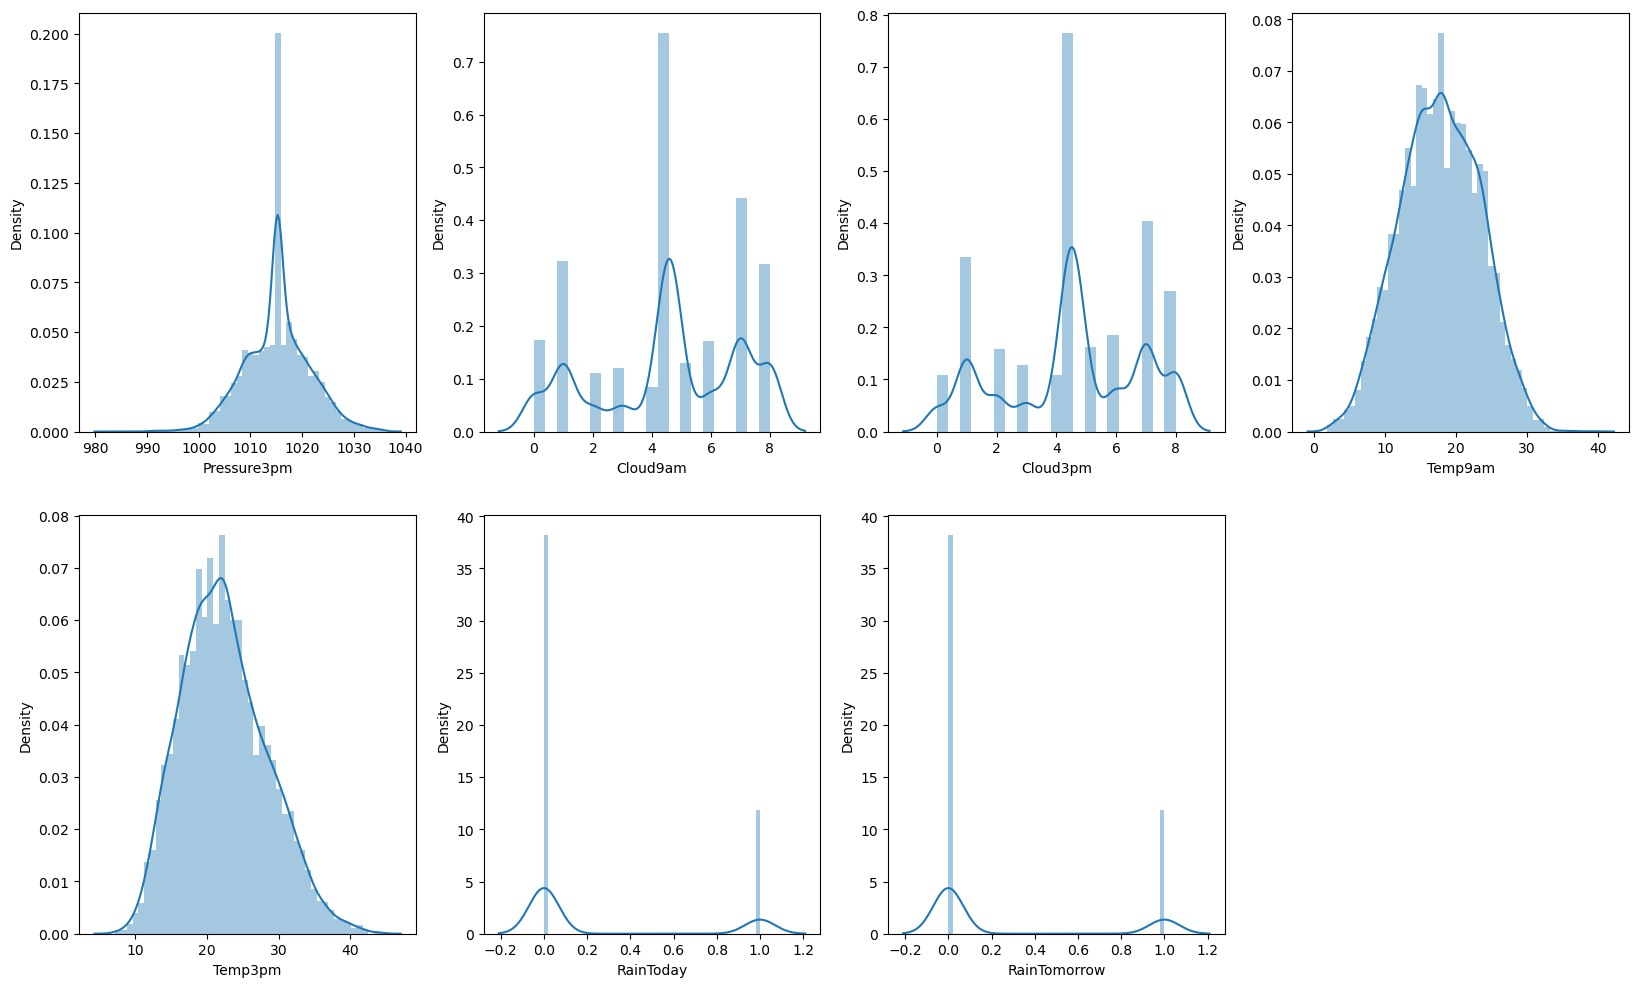

In [53]:
plt.figure(figsize=(20,25))
p=1
for i in b:
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1

In [ ]:
# we can see from the displot from above that skewness is present in some of the columns
# right skewed :- 'Date' , 'MaxTemp' , 'Rainfall' , 'Evaporation' , 'WindGustDir' , 'WindGustSpeed' , 'WindDir9am' , 
#                 'WindSpeed9am' , 'WindSpeed3am' , 'Temp9am' , 'Temp3pm' 
# left skewed :- 'MinTemp' , 'Sunshine' , 'Humdity9am' , 'Pressure3am' , 'Cloud9am' ,'Cloud3pm'
# categorical data is:-
# 'Date' , 'Location' , 'WindGustDir' , 'WindDir9am' , 'WindDir3pm' ,'RainToday' , 'RainTomorrow'



In [274]:
#we can check numerical value of skewness too
# acceptable range of skewness is +0.5 to -0.5
df.skew()
# Positive value means the distribution is skewed to the right.
# Negative value means the distribution is skewed to the left.
# 0 means perfect normal distribution. The bell shaped curve.

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

# REMOVING SKEWNESS

In [265]:
#removing skewness using cuberoot method
# these are the columns which have values more or less than +0.5 and -0.5 resp.
df['Rainfall']=np.cbrt(df['Rainfall'])
df['Evaporation']=np.cbrt(df['Evaporation'])
df['Sunshine']=np.cbrt(df['Sunshine'])
df['WindGustSpeed']=np.cbrt(df['WindGustSpeed'])
df['WindSpeed9am']=np.cbrt(df['WindSpeed9am'])
# df['RainToday']=np.cbrt(df['RainToday'])
# df['RainTomorrow']=np.cbrt(df['RainTomorrow'])
# 'Date' , 'Location' , 'WindGustDir' , 'WindDir9am' , 'WindDir3pm' ,'RainToday' , 'RainTomorrow' are categorical columns 
#  so it's better to not their skewness

In [239]:
df.skew()
# Rainfall , Evaporation , WindGustSpeed
#  Sunshine ,WindSpeed9am (after removing skewness these columns forms higly negative value exceeding 0.5 to -0.5 range) so it's 
#  best to not remove thier skewness

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.622698
Evaporation      0.176211
Sunshine        -2.816856
WindGustDir      0.119640
WindGustSpeed   -0.022921
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -1.220228
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

In [275]:
df['Rainfall']=np.cbrt(df['Rainfall'])
df['Evaporation']=np.cbrt(df['Evaporation'])

df['WindGustSpeed']=np.cbrt(df['WindGustSpeed'])


In [276]:
df.skew()

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         1.622698
Evaporation      0.176211
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed   -0.022921
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

In [277]:
df['Rainfall']=np.cbrt(df['Rainfall'])

In [278]:
df.skew()

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.676161
Evaporation      0.176211
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed   -0.022921
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

In [279]:
df['Rainfall']=np.cbrt(df['Rainfall'])

In [280]:
df.skew()

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.550519
Evaporation      0.176211
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed   -0.022921
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

In [281]:
df['Rainfall']=np.cbrt(df['Rainfall'])

In [282]:
df.skew()

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.535858
Evaporation      0.176211
Sunshine        -0.716525
WindGustDir      0.119640
WindGustSpeed   -0.022921
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

In [ ]:
# rainfall skewness is not removing further so let's leave it at that

# CHECKING FOR OUTLIERS

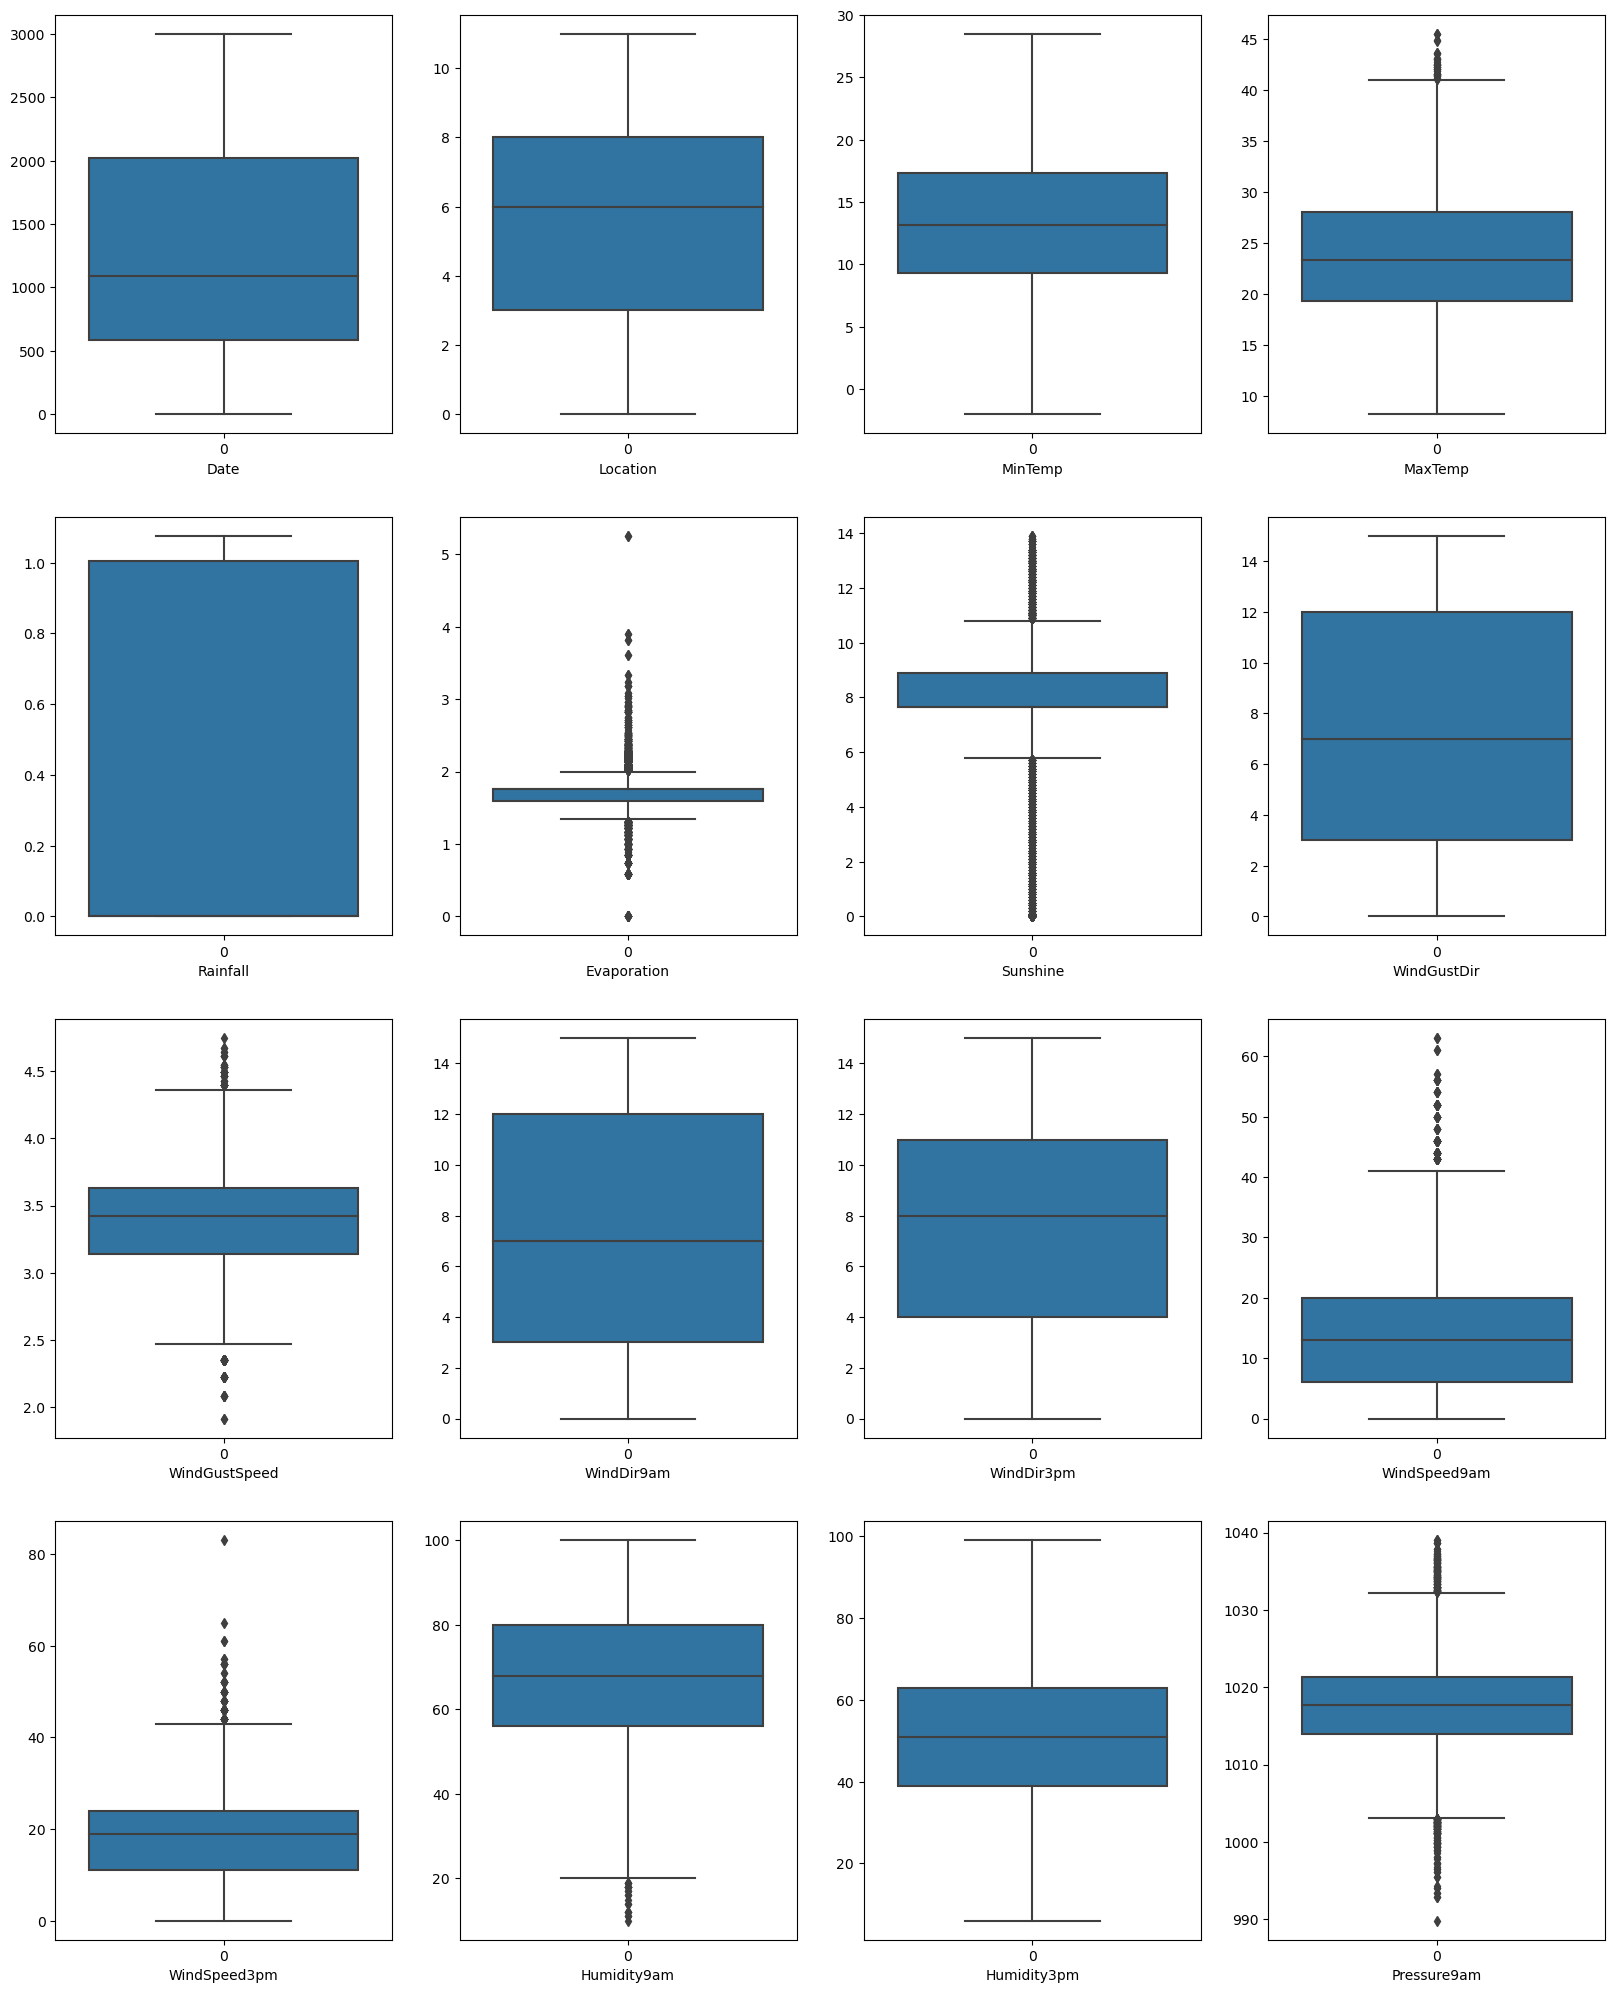

In [93]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in df.columns :
    if p<=16:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


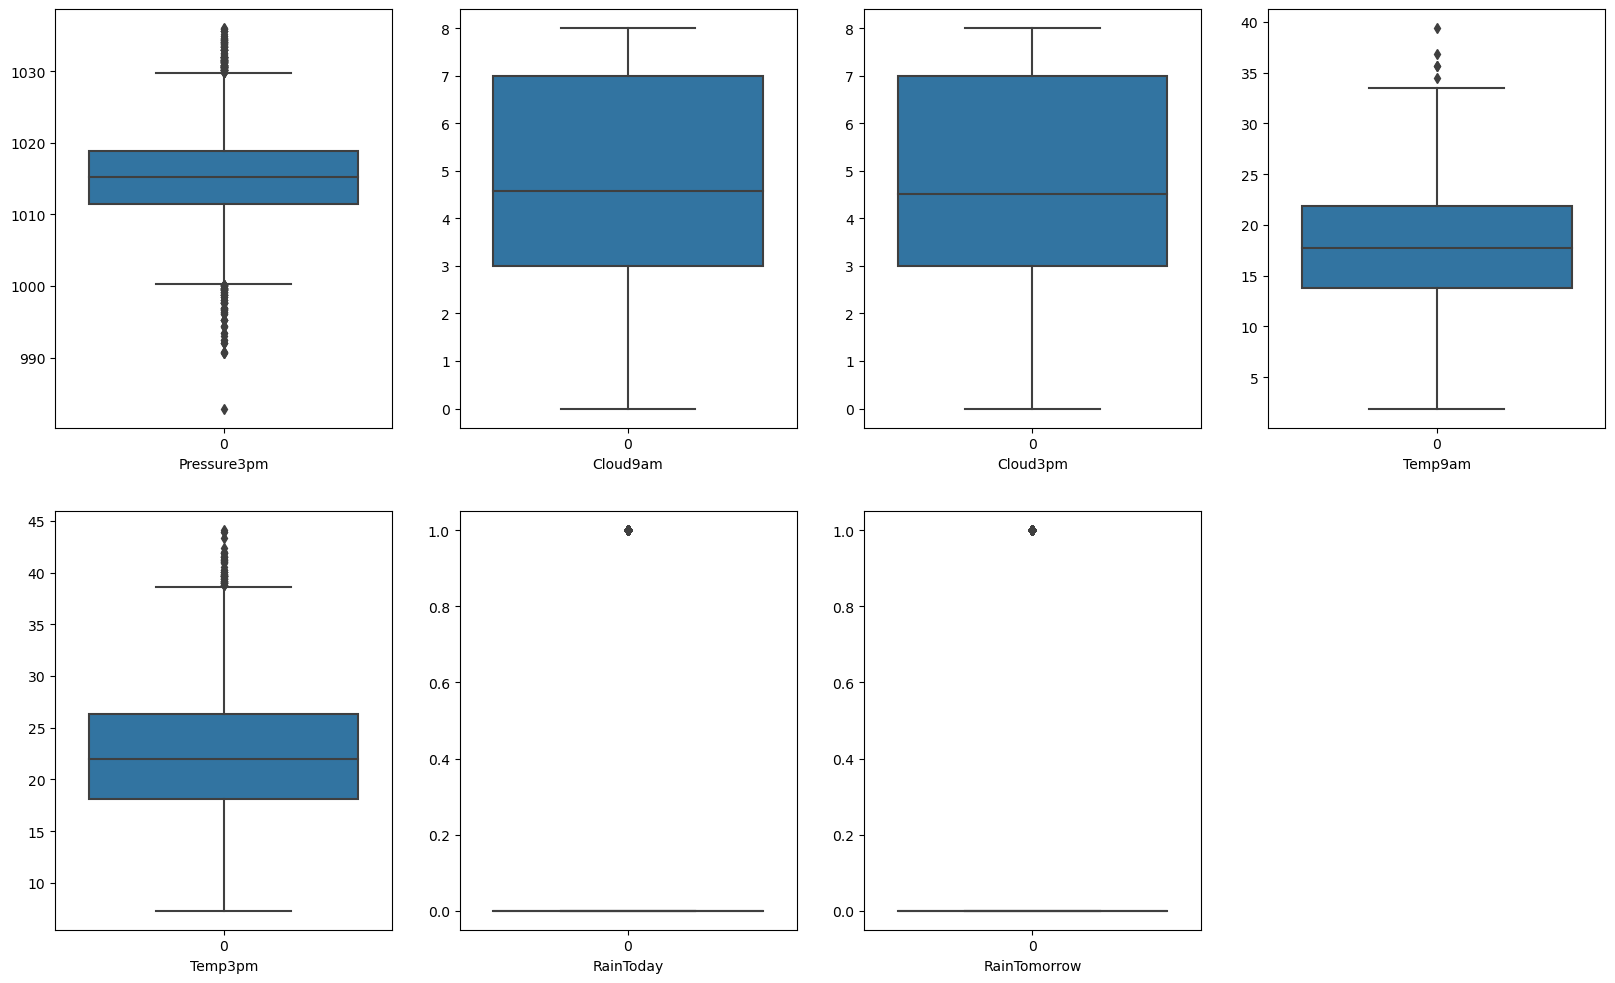

In [94]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in b :
    if p<=15:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from boxplots that outliers are present in the dataset
# outliers are present in :- 'MaxTemp' ,'Evaporation' , 'Sunshine' , 'WindGustSpeed' ,'WindSpeed9am' ,'WindSpeed3am' , 
# 'Humidity9am' , 'Pressure9am' , 'Pressure3pm' , 'Temp3pm'
 

In [95]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [283]:
#removing outliers
from scipy.stats import zscore
d=df[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]
z=np.abs(zscore(d))
z

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.517879,1.515776,0.038425,1.570089e-01,1.264546,0.184155,3.143679e-16,1.229643,0.383597,1.249535,1.397222,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.556099,0.556282
1,1.516709,1.515776,1.076989,2.028121e-01,0.767835,0.184155,3.143679e-16,1.442303,0.383597,0.276260,1.622961,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.556099,0.556282
2,1.515538,1.515776,0.054526,3.009450e-01,0.767835,0.184155,3.143679e-16,1.654964,0.518289,1.249535,1.622961,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.556099,0.556282
3,1.514367,1.515776,0.742365,6.771214e-01,0.767835,0.184155,3.143679e-16,0.684299,1.267087,0.377652,1.763120,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.556099,0.556282
4,1.513197,1.515776,0.800625,1.380408e+00,1.277404,0.184155,3.143679e-16,1.229643,0.173684,1.366114,0.182949,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.556099,0.556282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.993013,1.013895,1.932140,7.523137e-02,0.767835,0.184155,3.143679e-16,1.534940,0.610540,0.377652,1.537381,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.556099,0.556282
8421,1.994184,1.013895,1.783418,2.355231e-01,0.767835,0.184155,3.143679e-16,0.258979,1.477841,0.377652,1.085904,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.556099,0.556282
8422,1.995355,1.013895,1.448794,4.972110e-01,0.767835,0.184155,3.143679e-16,0.896959,0.122781,0.377652,1.397222,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.556099,0.556282
8423,1.996525,1.013895,1.002628,5.135665e-01,0.767835,0.184155,3.143679e-16,0.379002,0.878370,0.595623,1.085904,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.556099,0.556282


In [284]:
# above table shows z score of all columns 
# z score less than 3 contains 99.7% data
np.where(z>3)
#z score greater than 3 meaning outliers
# these values represent outliers

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
         407,  568,  568,  569,  602,  683,  683,  748,  748,  980, 1008,
        1189, 1387, 1413, 1467, 1480, 1535, 1587, 1644, 1665, 1898, 1903,
        1945, 2016, 2028, 2043, 2074, 2186, 2219, 2219, 2230, 2346, 2373,
        2389, 2527, 2527, 2710, 2738, 2743, 2744, 2768, 2835, 2849, 2855,
        2859, 2863, 2869, 2877, 2883, 2891, 2897, 2905, 2911, 2919, 2933,
        2939, 2947, 2953, 2961, 2967, 2975, 2989, 3051, 3058, 3059, 3059,
        3060, 3067, 3067, 3068, 3082, 3082, 3089, 3098, 3099, 3101, 3139,
        3141, 3153, 3157, 3164, 3167, 3172, 3172, 3178, 3206, 3212, 3212,
        3213, 3221, 3227, 3248, 3260, 3271, 3278, 3278, 3291, 3291, 3302,
        3302, 3303, 3449, 3449, 3450, 3458, 3471, 3557, 3617, 3687, 3701,
        3707, 3711, 3715, 3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771,
        3785, 3791, 3799, 3805, 3813, 

In [290]:
import numpy as np  
outlier_indices = np.where(z > 3)[0]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (8425, 23)
DataFrame Shape after Removing Outliers: (8080, 23)


In [286]:
import numpy as np  
outlier_indices = np.where(z > 3)[1]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (8425, 23)
DataFrame Shape after Removing Outliers: (8415, 23)


In [287]:
8425-8415
# 10  rows are removed

10

In [288]:
8425-8080
#345 rows are removed

345

In [291]:
# 345 rows have been deleted
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 4.09% we lose 4.09% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

4.094955489614243

# OR

In [111]:
df2=z[(z<3).all(axis=1)]
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.517879,1.515776,0.038425,1.570089e-01,1.264546,0.184155,3.143679e-16,1.229643,0.383597,1.249535,1.397222,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.556099,0.556282
1,1.516709,1.515776,1.076989,2.028121e-01,0.767835,0.184155,3.143679e-16,1.442303,0.383597,0.276260,1.622961,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.556099,0.556282
2,1.515538,1.515776,0.054526,3.009450e-01,0.767835,0.184155,3.143679e-16,1.654964,0.518289,1.249535,1.622961,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.556099,0.556282
3,1.514367,1.515776,0.742365,6.771214e-01,0.767835,0.184155,3.143679e-16,0.684299,1.267087,0.377652,1.763120,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.556099,0.556282
4,1.513197,1.515776,0.800625,1.380408e+00,1.277404,0.184155,3.143679e-16,1.229643,0.173684,1.366114,0.182949,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.556099,0.556282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.993013,1.013895,1.932140,7.523137e-02,0.767835,0.184155,3.143679e-16,1.534940,0.610540,0.377652,1.537381,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.556099,0.556282
8421,1.994184,1.013895,1.783418,2.355231e-01,0.767835,0.184155,3.143679e-16,0.258979,1.477841,0.377652,1.085904,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.556099,0.556282
8422,1.995355,1.013895,1.448794,4.972110e-01,0.767835,0.184155,3.143679e-16,0.896959,0.122781,0.377652,1.397222,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.556099,0.556282
8423,1.996525,1.013895,1.002628,5.135665e-01,0.767835,0.184155,3.143679e-16,0.379002,0.878370,0.595623,1.085904,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.556099,0.556282


In [112]:
df.shape

(8425, 23)

In [113]:
df2.shape

(8080, 23)

In [ ]:
# same results occur

# CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [114]:
df1.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.469327,0.009827,0.098577,0.039464,0.142734,0.058561,-0.088722,-0.015693,-0.026407,-0.005482,-0.087043,-0.056913,0.094084,-0.033652,0.042905,0.024915,0.006125,-0.002620,0.064245,0.110533,-0.005950,-0.007384
Location,0.469327,1.000000,0.114259,0.061737,0.023579,0.130377,0.052284,-0.035489,0.261557,-0.036377,-0.027366,0.236615,0.233725,0.002673,0.058328,-0.024450,-0.011532,0.041116,0.024889,0.115667,0.057758,0.004030,0.004293
MinTemp,0.009827,0.114259,1.000000,0.715552,0.059818,0.359056,0.052145,-0.151156,0.249964,-0.043625,-0.153255,0.142858,0.181740,-0.113529,0.097779,-0.431172,-0.425132,0.096949,0.044098,0.887436,0.683447,0.073496,0.096548
MaxTemp,0.098577,0.061737,0.715552,1.000000,-0.249518,0.456052,0.376998,-0.232131,0.147834,-0.219068,-0.189039,0.007270,0.088576,-0.377426,-0.406805,-0.327873,-0.408624,-0.250588,-0.246054,0.863884,0.974055,-0.217415,-0.151561
Rainfall,0.039464,0.023579,0.059818,-0.249518,1.000000,-0.190494,-0.275648,0.131519,0.073252,0.155085,0.117309,0.018616,0.022909,0.419019,0.385829,-0.111085,-0.034429,0.309471,0.272234,-0.123220,-0.259594,0.736771,0.298783
Evaporation,0.142734,0.130377,0.359056,0.456052,-0.190494,1.000000,0.364805,-0.110248,0.163897,-0.091928,-0.033260,0.084539,0.073852,-0.287988,-0.208783,-0.247056,-0.260492,-0.098698,-0.132452,0.424737,0.442403,-0.151200,-0.082687
Sunshine,0.058561,0.052284,0.052145,0.376998,-0.275648,0.364805,1.000000,-0.102715,0.006061,-0.078569,-0.065578,-0.014061,0.039719,-0.369077,-0.441112,0.008312,-0.051378,-0.530532,-0.544179,0.250011,0.394758,-0.230115,-0.324557
WindGustDir,-0.088722,-0.035489,-0.151156,-0.232131,0.131519,-0.110248,-0.102715,1.000000,0.011400,0.406248,0.506622,0.053375,0.111844,0.025856,0.046194,-0.102652,-0.015207,0.122823,0.092425,-0.181059,-0.245222,0.118530,0.044284
WindGustSpeed,-0.015693,0.261557,0.249964,0.147834,0.073252,0.163897,0.006061,0.011400,1.000000,-0.058877,0.091661,0.569328,0.630092,-0.266170,-0.079308,-0.379287,-0.334915,0.015687,0.066925,0.217875,0.110362,0.084774,0.174270
WindDir9am,-0.026407,-0.036377,-0.043625,-0.219068,0.155085,-0.091928,-0.078569,0.406248,-0.058877,1.000000,0.246377,0.082370,0.058905,0.015563,0.122027,-0.008523,0.078286,0.095650,0.064385,-0.103984,-0.226011,0.152690,0.031587


<Axes: >

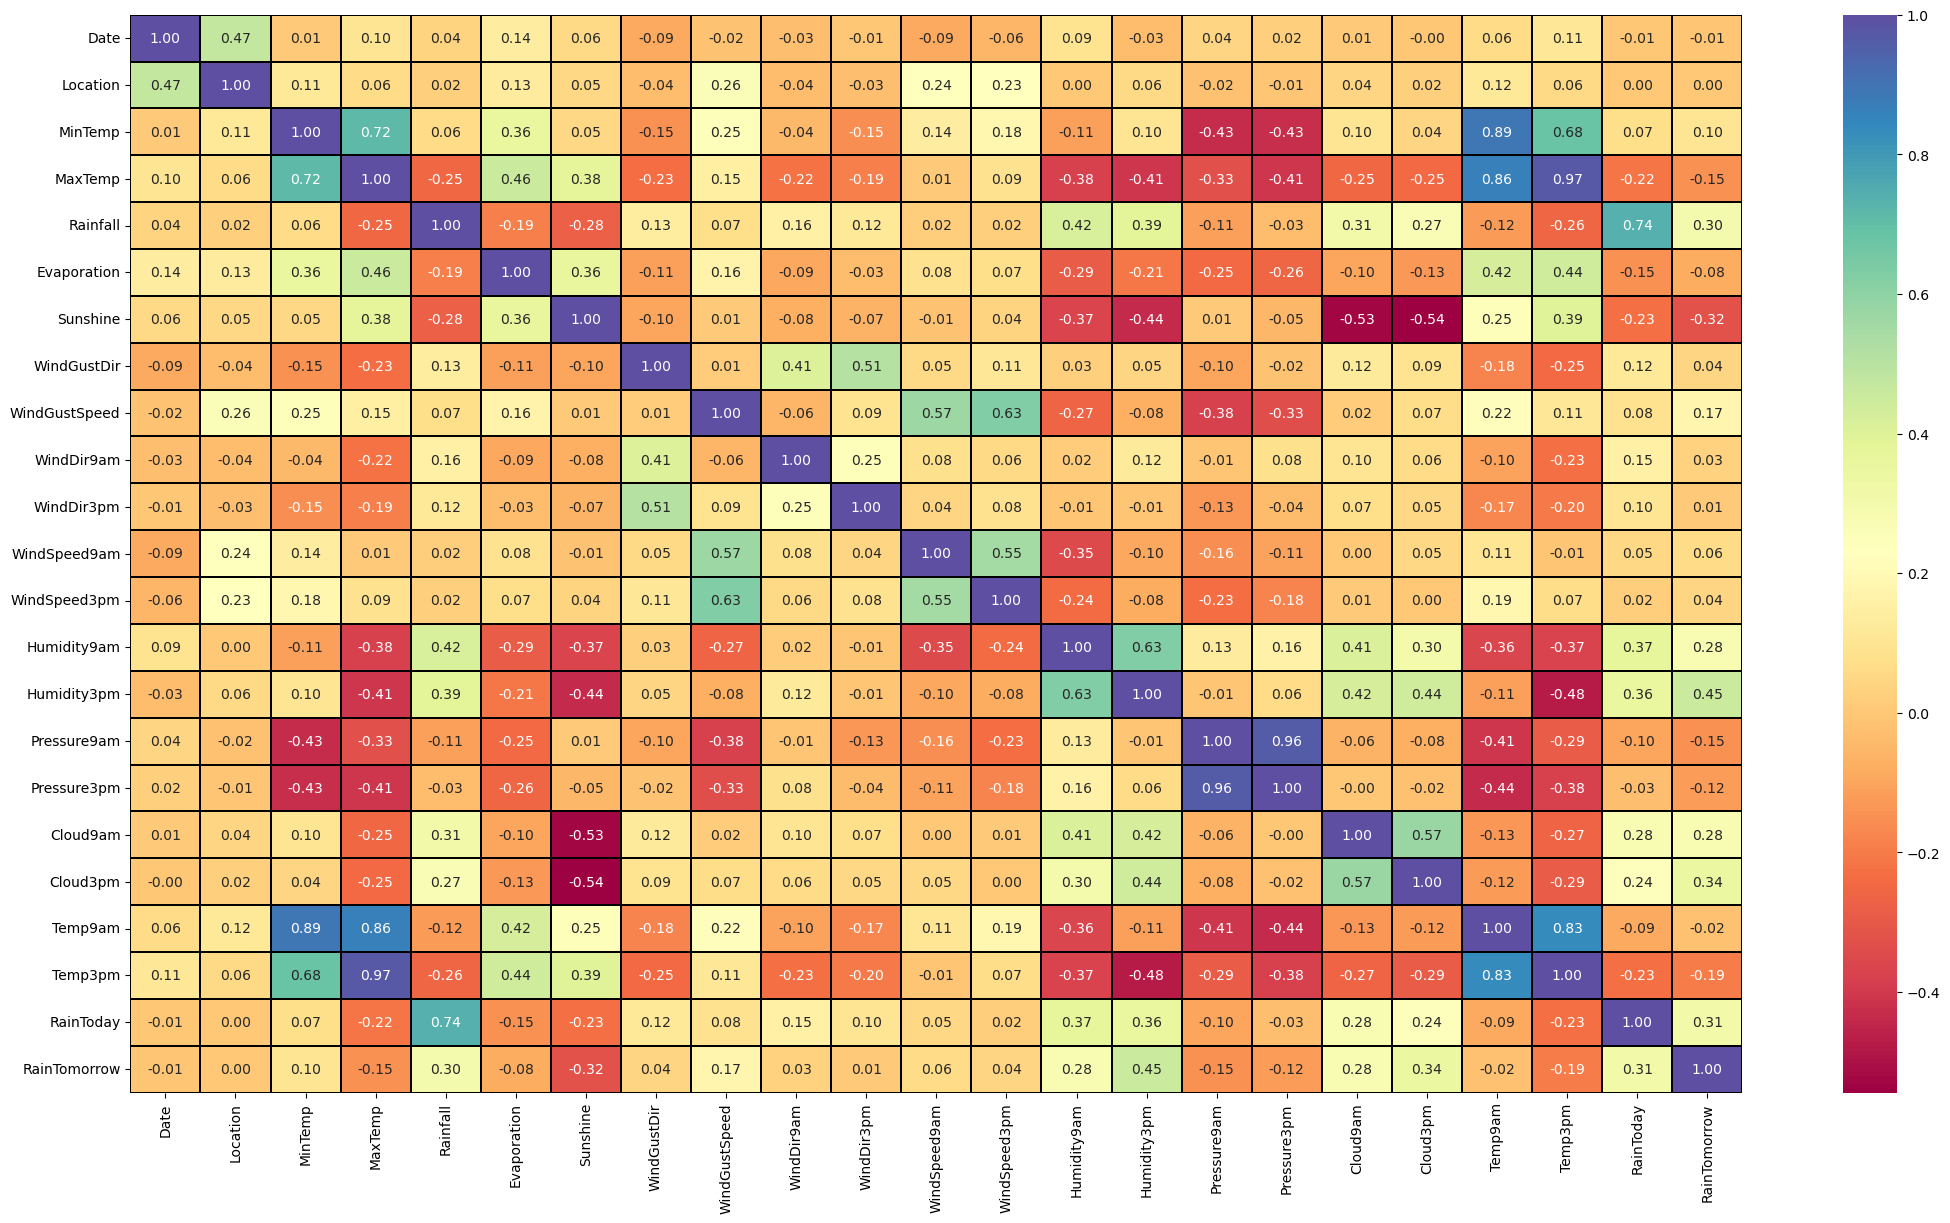

In [115]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset(having removed 7 rows)

In [ ]:
# 1) we can see from the above data that most of the column are not much correlated with each other
# 2) there is some correlation b/w  which can cause multicollinearity like 
#    'Date' and 'Location'(0.47) , 'MinTemp' and 'MaxTemp'(0.72) ,'MinTemp' and 'Temp9am'(0.89),'MinTemp' and 'Temp3pm'(0.68)
#    'MaxTemp' and "Evaporation"(0.46) , 'MaxTemp' and 'Temp9am'(0.86) , "MaxTemp" and 'Temp3pm'(0.97) etc
# 3)'RainTomorrow' which is label/target have also low correlation to other columns except for 'Humidity3pm'(0.45)
# 4) 'Rainfall' which is label/target have also low correlation with other columns except for 'Humidity9am'(0.42) , 
#    'RainToday'(0.74)

In [116]:
x=df1.drop(['RainTomorrow'],axis=1)
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.0,1.0,13.4,22.900000,0.993713,1.753261,7.632205,13.0,3.530348,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0
1,1.0,1.0,7.4,25.100000,0.000000,1.753261,7.632205,14.0,3.530348,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0
2,2.0,1.0,12.9,25.700000,0.000000,1.753261,7.632205,15.0,3.583048,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0
3,3.0,1.0,9.2,28.000000,0.000000,1.753261,7.632205,4.0,2.884499,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0
4,4.0,1.0,17.5,32.300000,1.000000,1.753261,7.632205,13.0,3.448217,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.000000,1.753261,7.632205,0.0,3.141381,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0
8421,3000.0,9.0,3.6,25.300000,0.000000,1.753261,7.632205,6.0,2.802039,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0
8422,3001.0,9.0,5.4,26.900000,0.000000,1.753261,7.632205,3.0,3.332222,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0
8423,3002.0,9.0,7.8,27.000000,0.000000,1.753261,7.632205,9.0,3.036589,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0


In [122]:
y=df1['RainTomorrow']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 8080, dtype: float64

In [118]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df3=pd.DataFrame(s.fit_transform(x),columns=x.columns)
df3

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.515642,-1.505553,0.043661,-0.151389,1.264565,0.236238,-0.007369,1.225437,0.429949,1.244283,1.397040,0.701678,0.629017,0.179005,-1.620997,-1.671730,-1.389091,1.411308,0.004265,-0.148813,-0.102073,-0.556383
1,-1.514466,-1.505553,-1.073450,0.216051,-0.767839,0.236238,-0.007369,1.437930,0.429949,-0.282491,1.623141,-0.991813,0.413132,-1.454859,-1.455919,-1.188127,-1.270968,0.000058,0.004265,-0.094671,0.327125,-0.556383
2,-1.513291,-1.505553,-0.049431,0.316262,-0.767839,0.236238,-0.007369,1.650423,0.569429,1.244283,1.623141,0.595835,0.844901,-1.817939,-1.180790,-1.688406,-1.119096,0.000058,-1.083987,0.591123,0.138278,-0.556383
3,-1.512116,-1.505553,-0.738316,0.700403,-0.767839,0.236238,-0.007369,-0.686999,-1.279429,0.371841,-1.768371,-0.250910,-0.990116,-1.394345,-1.951153,-0.020811,-0.427236,0.000058,0.004265,0.067754,0.704819,-0.556383
4,-1.510940,-1.505553,0.807020,1.418581,1.277423,0.236238,-0.007369,1.225437,0.212571,-1.373044,-0.185666,-0.674283,0.197248,0.844653,-1.015712,-1.154775,-1.574712,1.000270,1.524496,0.013612,1.254192,-0.556383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,2.009209,1.024051,-1.929901,-0.067880,-0.767839,0.236238,-0.007369,-1.536971,-0.599538,0.371841,-1.542271,-0.039224,-0.774232,-1.031264,-1.510945,1.146506,0.838363,0.000058,0.004265,-1.376024,0.000934,-0.556383
8076,2.010384,1.024051,-1.780953,0.249454,-0.767839,0.236238,-0.007369,-0.262013,-1.497677,0.371841,-1.090069,-0.039224,-0.990116,-0.728697,-1.676023,0.963070,0.635867,0.000058,0.004265,-1.231646,0.361460,-0.556383
8077,2.011559,1.024051,-1.445820,0.516683,-0.767839,0.236238,-0.007369,-0.899492,-0.094435,0.371841,1.397040,-0.462597,-0.990116,-0.910237,-1.510945,0.546172,0.247750,0.000058,0.004265,-0.942891,0.636147,-0.556383
8078,2.012735,1.024051,-0.998976,0.533385,-0.767839,0.236238,-0.007369,0.375466,-0.876891,0.589951,-1.090069,-0.039224,-1.206001,-1.031264,-1.510945,0.279356,0.197126,-0.643884,-1.083987,-0.473663,0.618979,-0.556383


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df3.values,i) for i in range(len(df3.columns))]
vif['features']=df3.columns
vif

,VIF values,features
0,1.492563,Date
1,1.545663,Location
2,8.602079,MinTemp
3,25.614036,MaxTemp
4,2.446818,Rainfall
5,1.511177,Evaporation
6,1.950334,Sunshine
7,1.612872,WindGustDir
8,2.306247,WindGustSpeed
9,1.347809,WindDir9am


In [ ]:
# some vif value are a little high like MaxTemp(25.6) , Pressure9am(19.7) , Pressure3pm , Temp9am(17.3) , Temp3pm(32.1) but they
# are not that high like 98 or 100 and we have already lost 4% data so it's better not to remove any more data
# since vif values for all the other columns are low we don't have to remove any columns fortunately

# EQUALING THE DATA

In [120]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [158]:
x1,y1=sm.fit_resample(df3,y)

In [159]:
x1
# 12376 rows 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.515642,-1.505553,0.043661,-0.151389,1.264565,0.236238,-0.007369,1.225437,0.429949,1.244283,1.397040,0.701678,0.629017,0.179005,-1.620997,-1.671730,-1.389091,1.411308,0.004265,-0.148813,-0.102073,-0.556383
1,-1.514466,-1.505553,-1.073450,0.216051,-0.767839,0.236238,-0.007369,1.437930,0.429949,-0.282491,1.623141,-0.991813,0.413132,-1.454859,-1.455919,-1.188127,-1.270968,0.000058,0.004265,-0.094671,0.327125,-0.556383
2,-1.513291,-1.505553,-0.049431,0.316262,-0.767839,0.236238,-0.007369,1.650423,0.569429,1.244283,1.623141,0.595835,0.844901,-1.817939,-1.180790,-1.688406,-1.119096,0.000058,-1.083987,0.591123,0.138278,-0.556383
3,-1.512116,-1.505553,-0.738316,0.700403,-0.767839,0.236238,-0.007369,-0.686999,-1.279429,0.371841,-1.768371,-0.250910,-0.990116,-1.394345,-1.951153,-0.020811,-0.427236,0.000058,0.004265,0.067754,0.704819,-0.556383
4,-1.510940,-1.505553,0.807020,1.418581,1.277423,0.236238,-0.007369,1.225437,0.212571,-1.373044,-0.185666,-0.674283,0.197248,0.844653,-1.015712,-1.154775,-1.574712,1.000270,1.524496,0.013612,1.254192,-0.556383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,-1.241523,-1.505553,-1.203763,-1.370081,1.300009,0.236238,-0.007369,0.238319,-0.523984,-0.718712,-1.075456,-0.360174,-0.551371,1.037926,0.991846,-0.990171,-1.245914,1.411308,1.524496,-1.297436,-1.274469,1.797322
12372,-1.392124,1.656452,1.189124,0.223457,0.738676,0.236238,-0.007369,-0.530048,0.466406,-0.936823,-0.863968,0.283124,1.562455,0.581273,1.484211,-0.452671,-0.822241,0.000058,0.004265,0.793538,0.239722,-0.556383
12373,-1.018588,-0.240751,1.023364,-0.052834,1.352097,2.710679,-2.181682,0.404916,1.294391,0.499684,0.414731,0.099523,-0.699846,1.414319,0.722239,-0.947730,-1.083609,1.411308,1.344572,0.191583,0.048968,1.797322
12374,-0.292505,-0.240751,0.030344,-0.952749,1.303641,-1.025442,-0.741775,0.819580,0.757272,1.145045,0.533344,0.384149,1.237274,0.355098,-0.284977,-1.494462,-1.045686,0.000058,0.004265,-0.562098,-0.885363,-0.556383


In [160]:
y1

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12371    1.0
12372    1.0
12373    1.0
12374    1.0
12375    1.0
Name: RainTomorrow, Length: 12376, dtype: float64

In [161]:
y1.value_counts()

RainTomorrow
0.0    6188
1.0    6188
Name: count, dtype: int64

In [162]:
for i in x1.columns:
    print(x1[i].value_counts())
    print('\n')

Date
-0.537757    8
-1.300554    8
-0.530705    8
-0.219240    7
-0.567141    7
            ..
 1.575114    1
-0.286007    1
-0.873565    1
-0.699784    1
-1.066418    1
Name: count, Length: 6913, dtype: int64


Location
-0.240751    2104
 1.340252    1647
 0.707851    1539
 0.075450    1252
-1.505553    1214
             ... 
-1.248417       1
 0.604566       1
 0.202023       1
-0.565899       1
-0.535523       1
Name: count, Length: 960, dtype: int64


MinTemp
 0.005178    100
-0.216998     75
 0.006424     73
 0.025043     73
-0.440420     72
            ... 
-1.578669      1
-0.362333      1
 0.046487      1
-0.700661      1
-0.618081      1
Name: count, Length: 4172, dtype: int64


MaxTemp
-0.802760    85
-0.001073    78
-0.669145    77
 0.199349    73
-0.251600    68
             ..
-0.632949     1
-1.158151     1
-1.177853     1
 0.151223     1
-1.248601     1
Name: count, Length: 4222, dtype: int64


Rainfall
-0.767839    6656
 1.237185     434
 1.303641     311
 1.254417     

In [ ]:
# all values are equally distributed using imblearn resample

# MODEL BUILDING

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [163]:
maxacc1=0
maxrs1=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x1_train,y1_train)
    pred1=rfc.predict(x1_test)
    acc1=accuracy_score(y1_test,pred1)
    if acc1>maxacc1:
        maxacc1=acc1
        maxrs1=i
print('best accuracy is',maxacc1,'at random state',maxrs1)

best accuracy is 0.9410180447077835 at random state 81


In [132]:
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , accuracy_score
from sklearn.model_selection import cross_val_score

In [165]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=81)
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
predrfc1=rfc.predict(x1_test)
print('accuracy score',accuracy_score(y1_test,predrfc1))
print('confusion_matrix',confusion_matrix(y1_test,predrfc1))
print('classification_report',classification_report(y1_test,predrfc1))

accuracy score 0.9377861567465661
confusion_matrix [[1709  119]
 [ 112 1773]]
classification_report               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      1828
         1.0       0.94      0.94      0.94      1885

    accuracy                           0.94      3713
   macro avg       0.94      0.94      0.94      3713
weighted avg       0.94      0.94      0.94      3713



In [166]:
lr=LogisticRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
print(accuracy_score(y1_test,predlr1))
print(confusion_matrix(y1_test,predlr1))
print(classification_report(y1_test,predlr1))

0.791004578507945
[[1493  335]
 [ 441 1444]]
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      1828
         1.0       0.81      0.77      0.79      1885

    accuracy                           0.79      3713
   macro avg       0.79      0.79      0.79      3713
weighted avg       0.79      0.79      0.79      3713



In [167]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
print(accuracy_score(y1_test,predsvc1))
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.8642607056288716
[[1560  268]
 [ 236 1649]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1828
         1.0       0.86      0.87      0.87      1885

    accuracy                           0.86      3713
   macro avg       0.86      0.86      0.86      3713
weighted avg       0.86      0.86      0.86      3713



In [168]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
predgbc1=gbc.predict(x1_test)
print(accuracy_score(y1_test,predgbc1))
print(confusion_matrix(y1_test,predgbc1))
print(classification_report(y1_test,predgbc1))

0.8666846215997845
[[1608  220]
 [ 275 1610]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1828
         1.0       0.88      0.85      0.87      1885

    accuracy                           0.87      3713
   macro avg       0.87      0.87      0.87      3713
weighted avg       0.87      0.87      0.87      3713



In [169]:
abc=AdaBoostClassifier()
abc.fit(x1_train,y1_train)
predabc1=abc.predict(x1_test)
print(accuracy_score(y1_test,predabc1))
print(confusion_matrix(y1_test,predabc1))
print(classification_report(y1_test,predabc1))

0.8265553460813359
[[1544  284]
 [ 360 1525]]
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83      1828
         1.0       0.84      0.81      0.83      1885

    accuracy                           0.83      3713
   macro avg       0.83      0.83      0.83      3713
weighted avg       0.83      0.83      0.83      3713



In [170]:
bc=BaggingClassifier()
bc.fit(x1_train,y1_train)
predbc1=bc.predict(x1_test)
print(accuracy_score(y1_test,predbc1))
print(confusion_matrix(y1_test,predbc1))
print(classification_report(y1_test,predbc1))

0.9116617290600593
[[1691  137]
 [ 191 1694]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1828
         1.0       0.93      0.90      0.91      1885

    accuracy                           0.91      3713
   macro avg       0.91      0.91      0.91      3713
weighted avg       0.91      0.91      0.91      3713



In [171]:
etc= ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
predetc1=etc.predict(x1_test)
print(accuracy_score(y1_test,predetc1))
print(confusion_matrix(y1_test,predetc1))
print(classification_report(y1_test,predetc1))

0.9528683005655804
[[1721  107]
 [  68 1817]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1828
         1.0       0.94      0.96      0.95      1885

    accuracy                           0.95      3713
   macro avg       0.95      0.95      0.95      3713
weighted avg       0.95      0.95      0.95      3713



In [172]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score
rfc_score1=cvs(rfc,x1,y1)
print(rfc_score1)
print(rfc_score1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predrfc1)-rfc_score1.mean())

[0.68941842 0.63555556 0.87272727 0.88929293 0.82868687]
0.7831362086127835
difference b/w accuracy score and cross val score 0.15464994813378252


In [173]:
lrscore1=cvs(lr,x1,y1)
print(lrscore1)
print(lrscore1.mean())
print('differnce b/w accuracy score and cross val score',accuracy_score(y1_test,predlr1)-lrscore1.mean())

[0.68982229 0.65414141 0.65616162 0.74585859 0.83434343]
0.7160654689055335
differnce b/w accuracy score and cross val score 0.07493910960241157


In [174]:
svcscore1=cvs(svc,x1,y1)
print(svcscore1)
print(svcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predsvc1)-svcscore1.mean())

[0.67528271 0.64121212 0.73979798 0.79474747 0.80121212]
0.7304504822049249
difference b/w accuracy score and cross val score 0.13381022342394666


In [175]:
gbcscore1=cvs(gbc,x1,y1)
print(gbcscore1)
print(gbcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predgbc1)-gbcscore1.mean())

[0.6223748  0.50383838 0.73131313 0.76444444 0.70828283]
0.6660507171880354
difference b/w accuracy score and cross val score 0.2006339044117491


In [176]:
abcscore1=cvs(abc,x1,y1)
print(abcscore1)
print(abcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predabc1)-abcscore1.mean())

[0.61066236 0.5010101  0.67717172 0.72888889 0.69575758]
0.6426981282942511
difference b/w accuracy score and cross val score 0.18385721778708475


In [177]:
bcscore1=cvs(bc,x1,y1)
print(bcscore1)
print(bcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predbc1)-bcscore1.mean())

[0.59289176 0.59555556 0.8840404  0.84686869 0.77292929]
0.7384571400597248
difference b/w accuracy score and cross val score 0.17320458900033442


In [178]:
etcscore1=cvs(etc,x1,y1)
print(etcscore1)
print(etcscore1.mean())
print('difference b/w accuracy score and cross val score',accuracy_score(y1_test,predetc1)-etcscore1.mean())

[0.72213247 0.70020202 0.88080808 0.89858586 0.82222222]
0.8047901307093552
difference b/w accuracy score and cross val score 0.14807816985622513


In [ ]:
#                                                 rfc       lr      svc       gbc      abc      bc     etc
# accuracy score(%)                              93.77    79.10    86.42     86.66   82.65    91.16    95.28    
# cvs score(%)                                   78.31    71.60    73.04     66.60   64.26    73.84    80.47
# difference b/w accuracy score and cvs score    0.154    0.074    0.133     0.200   0.183    0.173    0.148

In [ ]:
# 1) best model comes out to be etc as the accuracy score is 95.28 and cvs score is 80.47 and difference is 0.148
#    it's accuracy is more than any other model and cvs score is also higher than anyone and diiference b/w accuracy score and 
#    cvs score is lower(3rd lowest after lr and svc)
# 2) other best model can be rfc , bc , svc
#    2nd best model is rfc as it's accuracy is 2nd highest and cvs score is also 2nd highest and difference is also low 
#    similarly 3rd best model is bc and 4th best model is gbc

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [180]:
import joblib
joblib.dump(etc,'RAINFALL TOMORROW PREDICTION')

['RAINFALL TOMORROW PREDICTION']

In [181]:
model=joblib.load('RAINFALL TOMORROW PREDICTION')
prediction=model.predict(x1_test)
# prediction for x1_test

In [182]:
prediction

array([1., 1., 0., ..., 0., 0., 1.])

In [183]:
y1_test
# we can see that prediction and y1_test are somewhat similar because etc prediction accuracy score is 95.28%

10294    1.0
6218     1.0
7096     0.0
9281     1.0
7722     0.0
        ... 
6109     0.0
6577     0.0
6810     0.0
5057     0.0
2714     1.0
Name: RainTomorrow, Length: 3713, dtype: float64

In [185]:
x1_test
# features using which y1_test is predicted

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
10294,1.713133,1.077999,0.170490,0.615812,-0.767839,0.236238,-0.007369,1.166691,1.235905,-0.305578,-0.863968,-0.725952,-1.049800,0.710816,0.031084,-0.284401,-0.789756,1.021151,-0.154014,0.144190,0.657655,-0.556383
6218,-0.166349,-1.189352,1.812420,0.950930,1.237185,0.240401,0.658296,-1.111985,-0.424448,0.589951,-1.768371,-0.250910,-0.342463,-0.244589,0.580040,-0.671173,-0.579107,-1.054922,1.089749,1.583720,0.876498,-0.556383
7096,-0.077023,0.707851,0.453269,-0.435320,1.321389,0.079444,-0.410876,1.650423,1.090078,1.680504,1.623141,1.865953,0.844901,-1.212805,-0.520478,-0.771228,-0.140367,-1.465961,-0.214493,0.248226,-0.376760,1.797322
9281,0.560996,0.247777,-1.510147,-0.701046,-0.767839,0.236238,-0.007369,-0.088842,-0.258082,-0.936823,0.512983,-1.299818,-1.412172,1.152973,1.180094,-0.014101,-0.016157,-0.666991,0.300355,-1.590875,-1.213352,-0.556383
7722,0.670494,0.707851,-0.012194,0.633596,-0.767839,0.393593,0.979048,-1.536971,1.090078,-1.373044,-1.316170,1.336737,-0.558347,-1.152291,-1.731049,0.896367,0.618993,0.178193,0.655002,-0.022482,0.618979,-0.556383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,-0.294461,-1.189352,1.011824,0.232753,-0.767839,1.530105,-0.232681,-1.536971,-1.729586,-1.154933,-1.542271,-0.674283,-0.990116,-0.244589,-0.135297,0.429440,0.365873,1.000270,1.089749,0.952068,0.361460,-0.556383
6577,0.938472,-1.821753,-0.216998,-0.134687,-0.767839,1.941332,-0.007369,1.225437,-0.599538,1.680504,1.170939,-0.039224,-0.342463,-0.365616,-0.685556,0.279356,0.585243,0.000058,0.004265,-0.112719,-0.067737,-0.556383
6810,-0.423749,0.707851,-0.756935,-0.769356,-0.767839,-0.667773,-0.232681,-1.536971,0.061693,-1.373044,-1.768371,0.384149,-0.558347,-0.849724,0.029781,0.679579,0.483995,-1.465961,-0.214493,-1.087269,-0.788789,-0.556383
5057,-0.256850,-0.240751,-0.049431,0.917527,-0.767839,0.610692,2.012581,-0.899492,0.212571,-0.936823,-0.863968,1.760110,-0.558347,-1.333832,-1.565971,-0.621145,-0.882851,-1.054922,0.655002,0.374556,0.962337,-0.556383


# FOR REGRESSION PREDICTION OF RAINFALL(MM)

In [ ]:
# most of the data processing is same as before we only have to not remove skewness for Rainfall column as it is the label/target
# i'm doing the whole process quickly and i have explained all the parts before only skeness is being changed
# and because of that outliers removal is also changed

In [292]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# FILLING NULL VALUES

In [293]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna(df[i].mode(),inplace=True)
        
    else:
        df[i].fillna(df[i].mean(),inplace=True)
        

In [294]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [295]:
df['WindGustDir'].fillna('N',inplace=True)
df['WindDir9am'].fillna('N',inplace=True)
df['WindDir3pm'].fillna('SE',inplace=True)
df['RainToday'].fillna('No',inplace=True)
df['RainTomorrow'].fillna('No',inplace=True)


In [296]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [297]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [298]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,0.6,5.389395,7.632205,13.0,44.000000,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,0.0,5.389395,7.632205,14.0,44.000000,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,0.0,5.389395,7.632205,15.0,46.000000,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,0.0,5.389395,7.632205,4.0,24.000000,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.0,5.389395,7.632205,13.0,41.000000,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,0.0,5.389395,7.632205,0.0,31.000000,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,0.0,5.389395,7.632205,6.0,22.000000,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,0.0,5.389395,7.632205,3.0,37.000000,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,0.0,5.389395,7.632205,9.0,28.000000,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


# CHECKING FOR SKEWNESS

In [299]:
df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

In [300]:
df['Evaporation']=np.cbrt(df['Evaporation'])

df['WindGustSpeed']=np.cbrt(df['WindGustSpeed'])
# not removing skewness in categorical data column(RainTomorrow)

In [301]:
df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation       0.176211
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed    -0.022921
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

# REMOVING OUTLIERS

In [302]:
#removing outliers
from scipy.stats import zscore
d=df[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']]
z=np.abs(zscore(d))
z

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.517879,1.515776,0.038425,1.570089e-01,0.213986,0.184155,3.143679e-16,1.229643,0.383597,1.249535,1.397222,0.607461,0.563297,0.189439,1.597406,1.584003,1.308665,1.413459,3.862851e-16,0.153712,0.108138,0.556099,0.556282
1,1.516709,1.515776,1.076989,2.028121e-01,0.272189,0.184155,3.143679e-16,1.442303,0.383597,0.276260,1.622961,0.972321,0.357200,1.420268,1.433568,1.121880,1.196072,0.000000,3.862851e-16,0.100217,0.312348,0.556099,0.556282
2,1.515538,1.515776,0.054526,3.009450e-01,0.272189,0.184155,3.143679e-16,1.654964,0.518289,1.249535,1.622961,0.508725,0.769394,1.777981,1.160505,1.599939,1.051309,0.000000,1.088680e+00,0.577390,0.127334,0.556099,0.556282
3,1.514367,1.515776,0.742365,6.771214e-01,0.272189,0.184155,3.143679e-16,0.684299,1.267087,0.377652,1.763120,0.281166,0.982428,1.360650,1.925081,0.006411,0.391836,0.000000,3.862851e-16,0.060269,0.682376,0.556099,0.556282
4,1.513197,1.515776,0.800625,1.380408e+00,0.175183,0.184155,3.143679e-16,1.229643,0.173684,1.366114,0.182949,0.676112,0.151104,0.845246,0.996668,1.090010,1.485596,1.001777,1.520830e+00,0.006773,1.220599,0.556099,0.556282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.993013,1.013895,1.932140,7.523137e-02,0.272189,0.184155,3.143679e-16,1.534940,0.610540,0.377652,1.537381,0.083694,0.776331,1.002937,1.488181,1.109058,0.814518,0.000000,3.862851e-16,1.366273,0.007221,0.556099,0.556282
8421,1.994184,1.013895,1.783418,2.355231e-01,0.272189,0.184155,3.143679e-16,0.258979,1.477841,0.377652,1.085904,0.083694,0.982428,0.704843,1.652018,0.933770,0.621501,0.000000,3.862851e-16,1.223619,0.345987,0.556099,0.556282
8422,1.995355,1.013895,1.448794,4.972110e-01,0.272189,0.184155,3.143679e-16,0.896959,0.122781,0.377652,1.397222,0.478639,0.982428,0.883699,1.488181,0.535388,0.251553,0.000000,3.862851e-16,0.938310,0.615099,0.556099,0.556282
8423,1.996525,1.013895,1.002628,5.135665e-01,0.272189,0.184155,3.143679e-16,0.379002,0.878370,0.595623,1.085904,0.083694,1.188525,1.002937,1.488181,0.280424,0.203299,0.644950,1.088680e+00,0.474684,0.598279,0.556099,0.556282


In [303]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   67,   68,   68,  123,  296,  381,  381,  405,  406,  407,
         407,  431,  462,  568,  568,  569,  602,  683,  683,  699,  713,
         748,  748,  770,  796,  797,  802,  928,  935,  949,  979,  980,
         980, 1008, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1202,
        1203, 1237, 1241, 1264, 1265, 1357, 1387, 1411, 1412, 1413, 1413,
        1467, 1479, 1480, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665,
        1673, 1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
        2063, 2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265,
        2346, 2373, 2389, 2429, 2488, 2527, 2527, 2541, 2593, 2676, 2677,
        2710, 2735, 2738, 2743, 2744, 2768, 2835, 2849, 2849, 2855, 2859,
        2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905,
        2909, 2911, 2919, 2933, 2939, 2947, 2953, 2961, 2967, 2975, 2989,
        3003, 3051, 3051, 3058, 3059, 

In [350]:
import numpy as np  
outlier_indices = np.where(z > 3)[0]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (8425, 23)
DataFrame Shape after Removing Outliers: (7974, 23)


In [339]:
import numpy as np  
outlier_indices = np.where(z > 3)[1]
df1 = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", df1.shape)

Original DataFrame Shape: (8425, 23)
DataFrame Shape after Removing Outliers: (8414, 23)


In [306]:
8425-7974

451

In [307]:
8425-8414

11

In [351]:
# 451 rows have been deleted
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 5.35% we lose 5.35% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

5.353115727002968

# CHECKING FOR CORRELATION AND MULTICOLLINEARITY

In [310]:
df1.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.467420,0.012445,0.101279,0.013939,0.143912,0.054361,-0.090247,-0.016398,-0.029387,-0.009210,-0.087558,-0.058501,0.094477,-0.034429,0.042312,0.023562,0.006962,-0.001005,0.067615,0.113389,-0.006838,-0.005614
Location,0.467420,1.000000,0.119056,0.065238,0.024974,0.130397,0.048092,-0.035613,0.263340,-0.038599,-0.029575,0.238312,0.233485,0.002308,0.059717,-0.027763,-0.014981,0.042460,0.027046,0.120330,0.061353,0.004712,0.007681
MinTemp,0.012445,0.119056,1.000000,0.718495,0.091083,0.360043,0.062969,-0.152702,0.249834,-0.045865,-0.152584,0.142175,0.184256,-0.123064,0.090254,-0.431427,-0.426144,0.089974,0.036926,0.888275,0.686518,0.062208,0.090251
MaxTemp,0.101279,0.065238,0.718495,1.000000,-0.138806,0.458904,0.380938,-0.233902,0.151037,-0.218890,-0.187684,0.009839,0.091274,-0.378667,-0.408494,-0.328131,-0.408299,-0.250782,-0.247202,0.864757,0.974173,-0.217317,-0.150836
Rainfall,0.013939,0.024974,0.091083,-0.138806,1.000000,-0.094355,-0.166084,0.080866,0.091514,0.121745,0.073100,0.055974,0.038416,0.298751,0.290008,-0.105451,-0.045239,0.224259,0.188066,-0.034907,-0.147352,0.690716,0.269617
Evaporation,0.143912,0.130397,0.360043,0.458904,-0.094355,1.000000,0.372081,-0.109966,0.163476,-0.094375,-0.034028,0.083925,0.073561,-0.294635,-0.212653,-0.249153,-0.262651,-0.102612,-0.135559,0.427165,0.444732,-0.159595,-0.085930
Sunshine,0.054361,0.048092,0.062969,0.380938,-0.166084,0.372081,1.000000,-0.102032,0.013036,-0.075447,-0.066653,-0.007514,0.042005,-0.361064,-0.434096,0.004024,-0.054586,-0.526738,-0.541371,0.257713,0.398936,-0.215321,-0.317960
WindGustDir,-0.090247,-0.035613,-0.152702,-0.233902,0.080866,-0.109966,-0.102032,1.000000,0.010526,0.406992,0.506901,0.051649,0.113307,0.025719,0.047407,-0.101100,-0.013381,0.124317,0.093060,-0.181500,-0.246842,0.119375,0.045561
WindGustSpeed,-0.016398,0.263340,0.249834,0.151037,0.091514,0.163476,0.013036,0.010526,1.000000,-0.061732,0.091405,0.567864,0.631781,-0.275617,-0.086638,-0.380674,-0.337037,0.010793,0.062588,0.220030,0.113709,0.078477,0.170002
WindDir9am,-0.029387,-0.038599,-0.045865,-0.218890,0.121745,-0.094375,-0.075447,0.406992,-0.061732,1.000000,0.243890,0.080266,0.058371,0.010312,0.119708,-0.008068,0.078307,0.092131,0.063297,-0.103661,-0.226232,0.147049,0.026953


<Axes: >

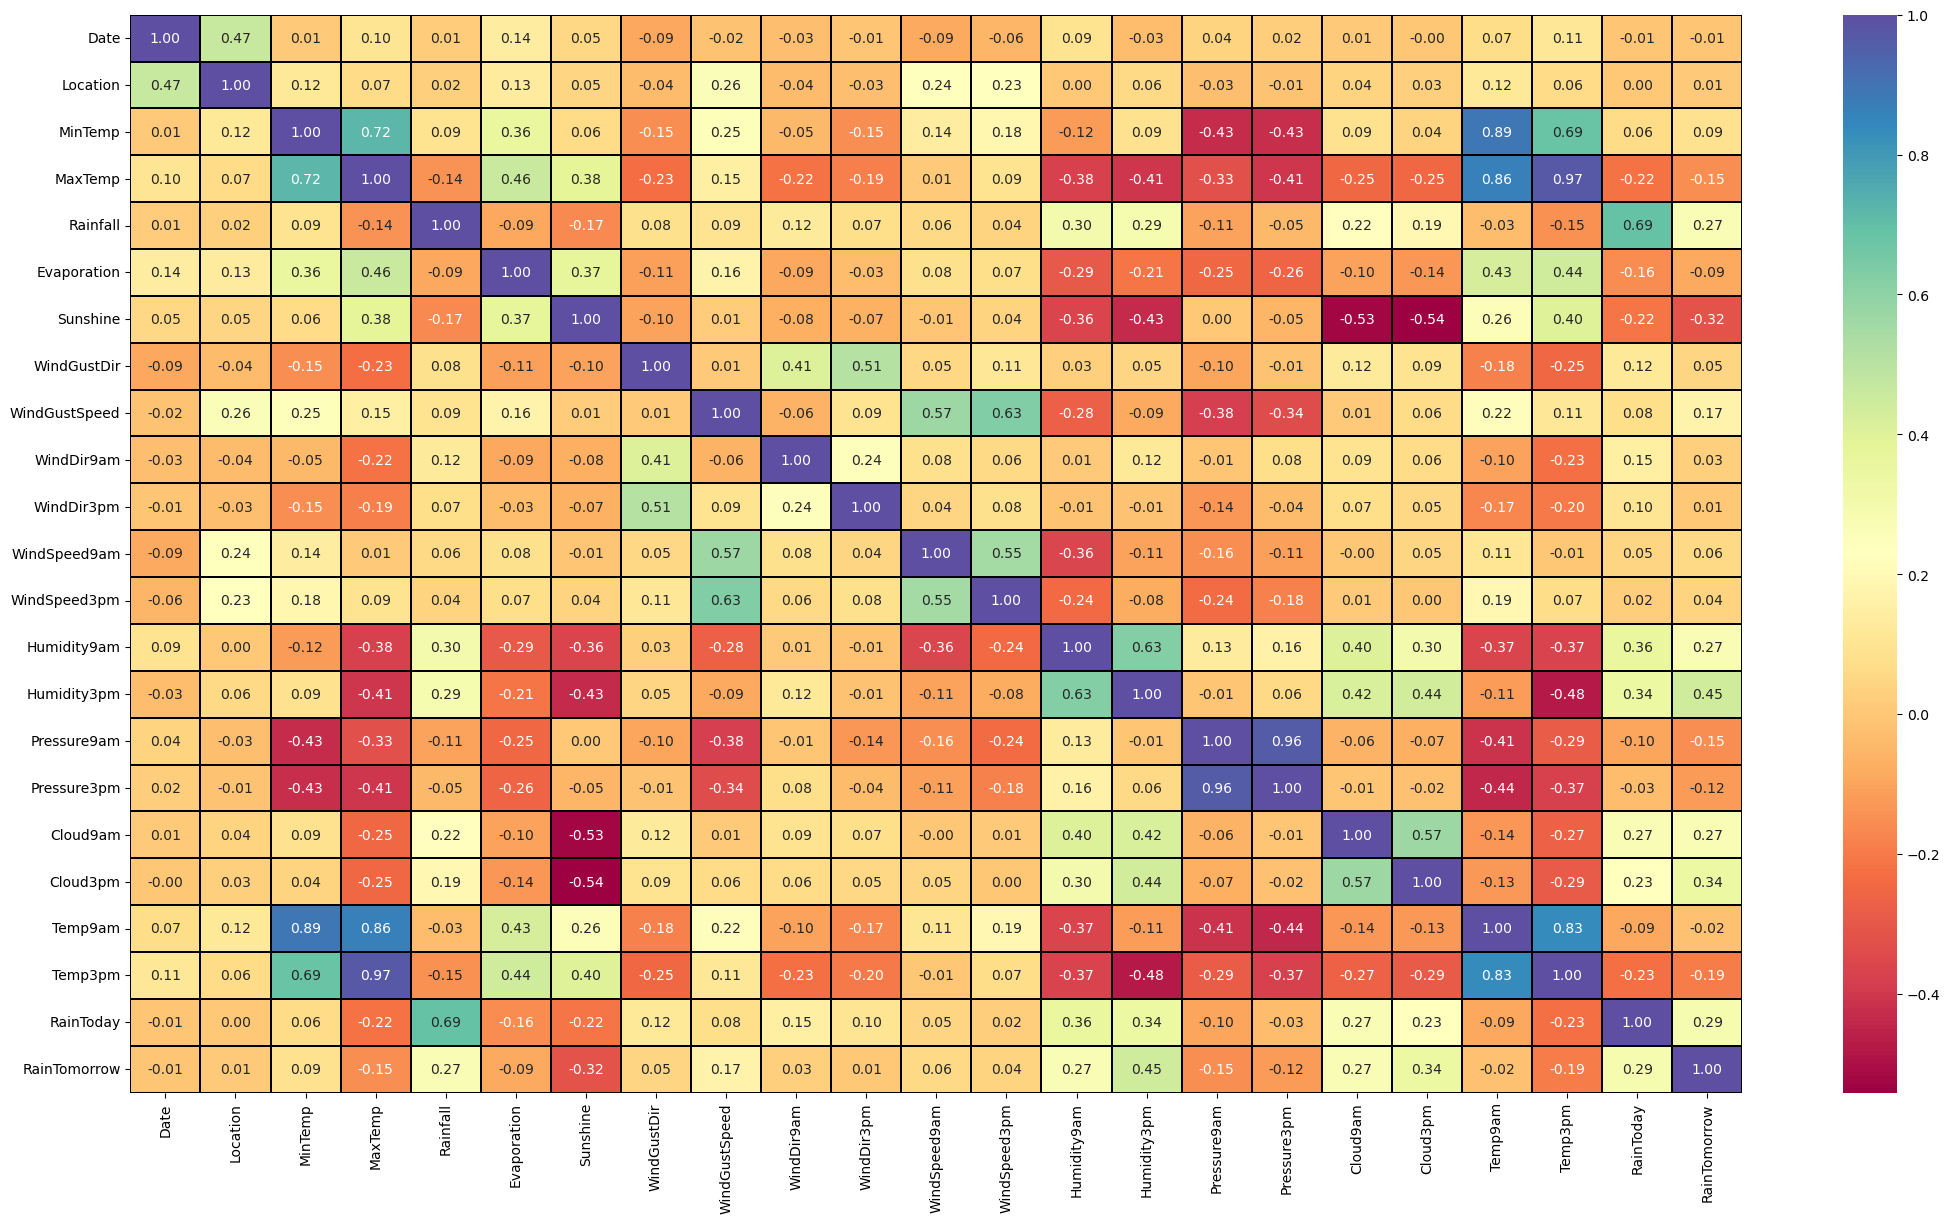

In [311]:
plt.figure(figsize=(26,14))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
# heat map for new dataset(having removed 7 rows)

In [ ]:
# correlation is also similar as before

In [352]:
x=df1.drop(['Rainfall'],axis=1)
x

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.0,1.0,13.4,22.900000,1.753261,7.632205,13.0,3.530348,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0
1,1.0,1.0,7.4,25.100000,1.753261,7.632205,14.0,3.530348,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0
2,2.0,1.0,12.9,25.700000,1.753261,7.632205,15.0,3.583048,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0
3,3.0,1.0,9.2,28.000000,1.753261,7.632205,4.0,2.884499,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0
4,4.0,1.0,17.5,32.300000,1.753261,7.632205,13.0,3.448217,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2999.0,9.0,2.8,23.400000,1.753261,7.632205,0.0,3.141381,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0.0,0.0
8421,3000.0,9.0,3.6,25.300000,1.753261,7.632205,6.0,2.802039,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0.0,0.0
8422,3001.0,9.0,5.4,26.900000,1.753261,7.632205,3.0,3.332222,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0.0,0.0
8423,3002.0,9.0,7.8,27.000000,1.753261,7.632205,9.0,3.036589,10.0,3.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0


In [353]:
y=df1['Rainfall']
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 7974, dtype: float64

In [354]:
y.value_counts()
#rainfall(in mm)

Rainfall
0.000000     5082
0.200000      382
2.805913      232
0.400000      174
0.600000      115
             ... 
23.800000       1
0.700000        1
31.100000       1
15.700000       1
26.800000       1
Name: count, Length: 172, dtype: int64

In [355]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(x),columns=x.columns)
df2

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.516561,-1.505869,0.050754,-0.153904,0.23802,-0.020225,1.226190,0.434481,1.250994,1.397167,0.706623,0.629010,0.193182,-1.617073,-1.673524,-1.387837,1.426349,0.014253,-0.146780,-0.105156,-0.540724,-0.543629
1,-1.515384,-1.505869,-1.064212,0.212264,0.23802,-0.020225,1.438577,0.434481,-0.277238,1.623114,-0.989858,0.412973,-1.446907,-1.450866,-1.189861,-1.269764,0.012425,0.014253,-0.092837,0.322690,-0.540724,-0.543629
2,-1.514208,-1.505869,-0.042160,0.312128,0.23802,-0.020225,1.650963,0.573903,1.250994,1.623114,0.600593,0.845047,-1.811371,-1.173853,-1.690202,-1.117955,0.012425,-1.075839,0.590447,0.134438,-0.540724,-0.543629
3,-1.513032,-1.505869,-0.729722,0.694940,0.23802,-0.020225,-0.685289,-1.274180,0.377718,-1.766095,-0.247647,-0.991267,-1.386163,-1.949488,-0.022398,-0.426381,0.012425,0.014253,0.068994,0.699194,-0.540724,-0.543629
4,-1.511855,-1.505869,0.812647,1.410631,0.23802,-0.020225,1.226190,0.217194,-1.368832,-0.184464,-0.671767,0.196936,0.861367,-1.007646,-1.156505,-1.573382,1.014531,1.537054,0.015050,1.246836,-0.540724,-0.543629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,2.011321,1.023753,-1.919019,-0.070684,0.23802,-0.020225,-1.534835,-0.594574,0.377718,-1.540147,-0.035587,-0.775230,-1.021698,-1.506268,1.145065,0.838693,0.012425,0.014253,-1.369498,-0.002473,-0.540724,-0.543629
7970,2.012498,1.023753,-1.770357,0.245552,0.23802,-0.020225,-0.260516,-1.492336,0.377718,-1.088253,-0.035587,-0.991267,-0.717978,-1.672476,0.961606,0.636281,0.012425,0.014253,-1.225649,0.356917,-0.540724,-0.543629
7971,2.013674,1.023753,-1.435867,0.511856,0.23802,-0.020225,-0.897676,-0.089683,0.377718,1.397167,-0.459707,-0.991267,-0.900210,-1.506268,0.544655,0.248325,0.012425,0.014253,-0.937950,0.630738,-0.540724,-0.543629
7972,2.014850,1.023753,-0.989881,0.528500,0.23802,-0.020225,0.376644,-0.871811,0.596037,-1.088253,-0.035587,-1.207304,-1.021698,-1.506268,0.277807,0.197722,-0.632737,-1.075839,-0.470441,0.613624,-0.540724,-0.543629


In [356]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df2.values,i) for i in range(len(df2.columns))]
vif['features']=df2.columns
vif

,VIF values,features
0,1.485560,Date
1,1.555521,Location
2,8.544849,MinTemp
3,25.744726,MaxTemp
4,1.517287,Evaporation
5,1.965610,Sunshine
6,1.619607,WindGustDir
7,2.381087,WindGustSpeed
8,1.348281,WindDir9am
9,1.487742,WindDir3pm


In [ ]:
# same as before vif values for all columns are low except for some columns

In [363]:
df3=df2.drop(['Temp3pm'],axis=1)
df3

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,RainToday,RainTomorrow
0,-1.516561,-1.505869,0.050754,-0.153904,0.23802,-0.020225,1.226190,0.434481,1.250994,1.397167,0.706623,0.629010,0.193182,-1.617073,-1.673524,-1.387837,1.426349,0.014253,-0.146780,-0.540724,-0.543629
1,-1.515384,-1.505869,-1.064212,0.212264,0.23802,-0.020225,1.438577,0.434481,-0.277238,1.623114,-0.989858,0.412973,-1.446907,-1.450866,-1.189861,-1.269764,0.012425,0.014253,-0.092837,-0.540724,-0.543629
2,-1.514208,-1.505869,-0.042160,0.312128,0.23802,-0.020225,1.650963,0.573903,1.250994,1.623114,0.600593,0.845047,-1.811371,-1.173853,-1.690202,-1.117955,0.012425,-1.075839,0.590447,-0.540724,-0.543629
3,-1.513032,-1.505869,-0.729722,0.694940,0.23802,-0.020225,-0.685289,-1.274180,0.377718,-1.766095,-0.247647,-0.991267,-1.386163,-1.949488,-0.022398,-0.426381,0.012425,0.014253,0.068994,-0.540724,-0.543629
4,-1.511855,-1.505869,0.812647,1.410631,0.23802,-0.020225,1.226190,0.217194,-1.368832,-0.184464,-0.671767,0.196936,0.861367,-1.007646,-1.156505,-1.573382,1.014531,1.537054,0.015050,-0.540724,-0.543629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,2.011321,1.023753,-1.919019,-0.070684,0.23802,-0.020225,-1.534835,-0.594574,0.377718,-1.540147,-0.035587,-0.775230,-1.021698,-1.506268,1.145065,0.838693,0.012425,0.014253,-1.369498,-0.540724,-0.543629
7970,2.012498,1.023753,-1.770357,0.245552,0.23802,-0.020225,-0.260516,-1.492336,0.377718,-1.088253,-0.035587,-0.991267,-0.717978,-1.672476,0.961606,0.636281,0.012425,0.014253,-1.225649,-0.540724,-0.543629
7971,2.013674,1.023753,-1.435867,0.511856,0.23802,-0.020225,-0.897676,-0.089683,0.377718,1.397167,-0.459707,-0.991267,-0.900210,-1.506268,0.544655,0.248325,0.012425,0.014253,-0.937950,-0.540724,-0.543629
7972,2.014850,1.023753,-0.989881,0.528500,0.23802,-0.020225,0.376644,-0.871811,0.596037,-1.088253,-0.035587,-1.207304,-1.021698,-1.506268,0.277807,0.197722,-0.632737,-1.075839,-0.470441,-0.540724,-0.543629


In [364]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df3.values,i) for i in range(len(df3.columns))]
vif['features']=df3.columns
vif

,VIF values,features
0,1.485524,Date
1,1.553513,Location
2,8.482180,MinTemp
3,9.513874,MaxTemp
4,1.516240,Evaporation
5,1.965565,Sunshine
6,1.616029,WindGustDir
7,2.365561,WindGustSpeed
8,1.347499,WindDir9am
9,1.487194,WindDir3pm


# MODEL BUILDING FOR REGRESSION

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import Lasso  , Ridge 

In [372]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(df3,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.5230273271351348 at random state 14


In [373]:
x1_train,x1_test,y1_train,y1_test=train_test_split(df2,y,test_size=0.30,random_state=14)

In [374]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
predlr1=lr.predict(x1_test)
pred_train_lr1=lr.predict(x1_train)
print(lr)
print('r2 score',r2_score(y1_test,predlr1))
print('r2 score on training data',r2_score(y1_train,pred_train_lr1))
print('mean absolute error',mean_absolute_error(y1_test,predlr1))
print('mean squared error',mean_squared_error(y1_test,predlr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predlr1)))

LinearRegression()
r2 score 0.523467043071514
r2 score on training data 0.4758697096418222
mean absolute error 1.5863213654017945
mean squared error 11.088035416328463
root mean squared error 3.32987018010139


In [375]:
rfr=RandomForestRegressor()
rfr.fit(x1_train,y1_train)
predrfr1=rfr.predict(x1_test)
pred_train_rfr1=rfr.predict(x1_train)
print(rfr)
print('r2 score',r2_score(y1_test,predrfr1))
print('r2 score on training data',r2_score(y1_train,pred_train_rfr1))
print('mean absloute error',mean_absolute_error(y1_test,predrfr1))
print('mean squared error',mean_squared_error(y1_test,predrfr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predrfr1)))

RandomForestRegressor()
r2 score 0.6659325017865552
r2 score on training data 0.9444336457693783
mean absloute error 1.094479340654796
mean squared error 7.773129219666562
root mean squared error 2.7880332171024365


In [376]:
knn=KNeighborsRegressor()
knn.fit(x1_train,y1_train)
predknn1=knn.predict(x1_test)
pred_train_knn1=knn.predict(x1_train)
print(knn)
print('r2 score',r2_score(y1_test,predknn1))
print('r2 score on training data',r2_score(y1_train,pred_train_knn1))
print('mean absloute error',mean_absolute_error(y1_test,predknn1))
print('mean squared error',mean_squared_error(y1_test,predknn1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predknn1)))

KNeighborsRegressor()
r2 score 0.5035622970126045
r2 score on training data 0.6427534487561108
mean absloute error 1.3956218771865916
mean squared error 11.551181828439754
root mean squared error 3.3987029626667513


In [377]:
dtr=DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
preddtr1=dtr.predict(x1_test)
pred_train_dtr1=dtr.predict(x1_train)
print(dtr)
print('r2 score',r2_score(y1_test,preddtr1))
print('r2 score on training data',r2_score(y1_train,pred_train_dtr1))
print('mean absloute error',mean_absolute_error(y1_test,preddtr1))
print('mean squared error',mean_squared_error(y1_test,preddtr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,preddtr1)))

DecisionTreeRegressor()
r2 score 0.371556644806566
r2 score on training data 1.0
mean absloute error 1.2235667101740697
mean squared error 14.62270778595238
root mean squared error 3.823964930010784


In [378]:
l=Lasso()
l.fit(x1_train,y1_train)
predl1=l.predict(x1_test)
pred_train_l1=l.predict(x1_train)
print(l)
print('r2 score',r2_score(y1_test,predl1))
print('r2 score on training data',r2_score(y1_train,pred_train_l1))
print('mean absloute error',mean_absolute_error(y1_test,predl1))
print('mean squared error',mean_squared_error(y1_test,predl1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predl1)))

Lasso()
r2 score 0.44816769074170826
r2 score on training data 0.41828121461010437
mean absloute error 1.7567512838555837
mean squared error 12.840111266110197
root mean squared error 3.5833100990718343


In [379]:
r=Ridge()
r.fit(x1_train,y1_train)
predr1=r.predict(x1_test)
pred_train_r1=r.predict(x1_train)
print(r)
print('r2 score',r2_score(y1_test,predr1))
print('r2 score on training data',r2_score(y1_train,pred_train_r1))
print('mean absloute error',mean_absolute_error(y1_test,predr1))
print('mean squared error',mean_squared_error(y1_test,predr1))
print('root mean squared error',np.sqrt(mean_squared_error(y1_test,predr1)))

Ridge()
r2 score 0.5234530278861123
r2 score on training data 0.4758696510395549
mean absloute error 1.5862257142491305
mean squared error 11.088361523620398
root mean squared error 3.3299191467091807


In [380]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lrscore1=cvs(lr,df3,y,scoring='r2')
print(lrscore1)
print(lrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predlr1)-lrscore1.mean())*100)

[0.50731105 0.47070514 0.46754458 0.44272311 0.53453946]
0.4845646677798622
difference b/w r2 score and cross validation score 3.890237529165186


In [381]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rfrscore1=cvs(rfr,df3,y,scoring='r2')
print(rfrscore1)
print(rfrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predrfr1)-rfrscore1.mean())*100)

[0.49044175 0.57248835 0.68451874 0.56510106 0.53881137]
0.570272252525073
difference b/w r2 score and cross validation score 9.56602492614822


In [382]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
knnscore1=cvs(knn,df3,y,scoring='r2')
print(knnscore1)
print(knnscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predknn1)-knnscore1.mean())*100)

[0.39690938 0.40371288 0.39066732 0.44524256 0.38645428]
0.4045972840536197
difference b/w r2 score and cross validation score 9.896501295898474


In [383]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
dtrscore1=cvs(dtr,df3,y,scoring='r2')
print(dtrscore1)
print(dtrscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,preddtr1)-dtrscore1.mean())*100)

[-0.21340801  0.36413297  0.5204931   0.41086574  0.05396957]
0.22721067268610556
difference b/w r2 score and cross validation score 14.434597212046047


In [384]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
lscore1=cvs(l,df3,y,scoring='r2')
print(lscore1)
print(lscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predl1)-lscore1.mean())*100)

[0.46142319 0.42884056 0.40453619 0.41260443 0.45945591]
0.43337205533486606
difference b/w r2 score and cross validation score 1.47956354068422


In [385]:
from sklearn.model_selection import cross_val_score 
cvs=cross_val_score
rscore1=cvs(r,df3,y,scoring='r2')
print(rscore1)
print(rscore1.mean())
print('difference b/w r2 score and cross validation score',(r2_score(y1_test,predr1)-rscore1.mean())*100)

[0.50732787 0.47072154 0.46752826 0.44277793 0.5345164 ]
0.48457440050176465
difference b/w r2 score and cross validation score 3.8878627384347606


In [ ]:
#                                      lr      rfr      knn       dtr      l       r
# r2 score(%)                        52.34    66.59    50.35     37.15    44.81   52.34
# on training data(%)                47.58    94.44    64.27     1.0      41.82   47.58
# MAE                                1.586    1.094    1.395     1.223    1.756   1.586
# MSE                                11.08    7.773    11.55     14.62    12.84   11.08
# RMSE                               3.329    2.788    3.398     3.823    3.583   3.329
# cvs score(%)                       48.45    57.02    40.45     22.72    43.33   48.45
# difference b/w r2 and cvs score(%) 3.890    9.566    9.896     14.43    1.479   3.887

In [ ]:
# we can see from the above results that rfr is the best model for this as it's r2 score is highest (66.59%)
# and it's cvs score is highest compared to others(57.02%) and difference b/w cvs and r2 score is low (9.566)
# other model can be made from lr as its r2 score is 52.34% and cvs score(47.58%) same as r but difference in r2 and cvs score 
# is a little more than r (3.890)
# another best model can be then r after lr
# in dtr we can see that its accuracy on training data is 100% but on test data it's 37.15% so overfitting can be seen in this 
# case to some extent and others also show overfitting as rfr r2 score on training data is 94.44% but on test data it is 66.59% 
# etc and cvs score(57.02) for rfr is low compared to it's r2 score 
# there is a lot of overfitting and errors in data as both cvs score and r2 score is low in all models 


# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [387]:
import joblib
joblib.dump(rfr,'Rainfall Weather Forecasting(Rainfall(mm) PREDICTION)')

['Rainfall Weather Forecasting(Rainfall(mm) PREDICTION)']

In [388]:
model=joblib.load('Rainfall Weather Forecasting(Rainfall(mm) PREDICTION)')
prediction=model.predict(x1_test)
prediction
# prediction for x1_test

array([0.106     , 4.298     , 0.02      , ..., 0.09811827, 0.01      ,
       0.11005913])

In [389]:
y1_test
# most of these values are different from x1_test prediction as r2 score is not that high(66.59%)

5681     0.0
3329     2.0
6825     0.0
2880     4.0
7196    13.0
        ... 
530      0.0
4932     0.2
926      0.2
722      0.0
3765     0.0
Name: Rainfall, Length: 2393, dtype: float64

In [390]:
x1_test

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5343,-0.742521,-0.241058,-0.562477,-1.169187,-1.259202,-2.765436,1.013804,-0.594574,1.032675,0.493378,0.600593,-0.559193,0.618391,0.820637,1.662084,1.867619,1.014531,1.101572,-0.955931,-1.303123,-0.540724,-0.543629
3173,1.890157,1.339955,0.645402,0.095756,0.238020,-0.020225,0.164257,0.573903,1.469312,0.719325,0.176473,0.629010,1.529552,1.097649,-0.606129,-0.375778,1.014531,0.666090,-0.002931,0.065982,1.849372,-0.543629
6423,0.863201,-1.822071,-1.324371,-0.253767,0.238020,-0.020225,1.438577,-0.594574,-0.277238,-0.410411,-0.671767,-0.343156,-0.960954,-1.118451,1.228455,0.923031,0.012425,0.014253,-0.578327,-0.105156,-0.540724,-0.543629
2775,1.361974,1.339955,0.589654,0.844735,-0.772359,-0.020225,-1.322449,0.363181,-1.587151,-1.314200,-0.459707,1.385139,0.132438,-0.176608,0.077670,0.147119,0.190897,-1.075839,0.968051,0.767649,1.849372,-0.543629
6769,-0.350795,0.707550,-0.302319,-1.002747,-0.361238,-0.607309,1.013804,2.300889,1.687631,1.623114,-0.247647,2.789379,1.165087,-0.509023,-2.057119,-0.932411,1.426349,0.666090,-0.919969,-1.097757,1.849372,1.839491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,-0.893094,-1.505869,-2.030515,-0.902883,0.238020,-0.020225,0.376644,-2.684722,-0.932194,-1.540147,-1.413978,-1.747396,0.922111,-0.398218,0.361197,0.332663,0.012425,0.014253,-1.729120,-0.738367,-0.540724,-0.543629
4662,-0.669587,-0.241058,-0.227988,-0.303699,0.162929,0.939349,0.164257,-0.419557,0.159400,0.493378,-0.035587,-0.127119,0.436159,0.322014,1.078353,0.990501,0.012425,0.014253,-0.470441,-0.242066,-0.540724,-0.543629
899,-1.377751,-0.873463,0.812647,0.212264,-0.559168,0.076098,-1.110062,0.363181,1.032675,0.719325,0.706623,0.088918,-0.049794,1.208454,0.611368,0.686884,0.190897,0.230608,0.644390,0.220007,-0.540724,1.839491
700,-0.667234,-1.505869,0.310912,0.927955,0.238020,-0.020225,-0.897676,-0.594574,-1.368832,-0.636359,0.918683,-0.127119,-1.143187,-0.952243,0.961606,0.872428,0.012425,-1.075839,0.986032,1.024356,-0.540724,-0.543629
